# Khám Phá Dataset - Thông Tin Cơ Bản

## 1. Basic Information (Thông tin cơ bản)

In [56]:
# Import các thư viện cần thiết (KHÔNG SỬ DỤNG PANDAS)
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Đọc dữ liệu CSV sử dụng file I/O thuần túy và NumPy (KHÔNG DÙNG thư viện csv)
data_path = '../data/raw/BankChurners.csv'

# Đọc file CSV
with open(data_path, 'r') as file:
    lines = file.readlines()
    # Loại bỏ dấu ngoặc kép và spaces từ header
    header = [col.strip().strip('"') for col in lines[0].strip().split(',')]
    # Loại bỏ dấu ngoặc kép từ data
    data_list = [[cell.strip().strip('"') for cell in line.strip().split(',')] for line in lines[1:]]

# Chuyển sang numpy array
raw_data = np.array(data_list, dtype=object)
column_names = header

print(f"Đã tải dữ liệu thành công!")
print(f"Số cột: {len(column_names)}")
print(f"Tên các cột: {column_names[:5]}... (và {len(column_names)-5} cột khác)")

Đã tải dữ liệu thành công!
Số cột: 23
Tên các cột: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count']... (và 18 cột khác)


### 1.1. Số lượng hàng và cột

In [58]:
# Kích thước dataset
n_rows, n_cols = raw_data.shape

print(f"THÔNG TIN CƠ BẢN VỀ DATASET")
print(f"{'='*50}")
print(f"Số lượng hàng (rows):     {n_rows:,}")
print(f"Số lượng cột (columns):   {n_cols}")

THÔNG TIN CƠ BẢN VỀ DATASET
Số lượng hàng (rows):     10,127
Số lượng cột (columns):   23


### 1.2. Ý nghĩa của mỗi hàng và kích thước tổng thể

In [59]:
# Xem vài dòng đầu để hiểu cấu trúc
print("MẪU DỮ LIỆU (5 dòng đầu):")
print("="*80)
print(f"Columns: {', '.join(column_names)}")
print("="*80)
for i, row in enumerate(raw_data[:5]):
    print(f"\nDòng {i+1}:")
    for j, col_name in enumerate(column_names[:10]):  # Hiển thị 10 cột đầu
        print(f"  {col_name}: {row[j]}")


MẪU DỮ LIỆU (5 dòng đầu):
Columns: CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

Dòng 1:
  CLIENTNUM: 768805383
  Attrition_Flag: Existing Customer
  Customer_Age: 45
  Gender: M
  Dependent_count: 3
  Education_Level: High School
  Marital_Status: Married
  Income_Category: $60K - $80K
  Card_Category: Blue
  Months_on_book: 39

Dòng 2:
  CLIENTNUM: 818770008
  Attrition_Flag: Existing Customer
  Customer_A

## 2. Data Integrity (Tính toàn vẹn dữ liệu)

### 2.1. Kiểm tra dòng trùng lặp (Duplicated Rows)

In [60]:
# Kiểm tra dòng trùng lặp hoàn toàn bằng NumPy
# Chuyển mỗi dòng thành tuple để so sánh
rows_as_tuples = [tuple(row) for row in raw_data]
unique_rows = set(rows_as_tuples)
total_duplicates = len(rows_as_tuples) - len(unique_rows)
duplicate_percentage = (total_duplicates / len(rows_as_tuples)) * 100

print(f"KIỂM TRA DÒNG TRÙNG LẶP")
print(f"{'='*50}")
print(f"Tổng số dòng:              {n_rows:,}")
print(f"Số dòng trùng lặp:         {total_duplicates:,}")
print(f"Tỷ lệ trùng lặp:           {duplicate_percentage:.2f}%")

KIỂM TRA DÒNG TRÙNG LẶP
Tổng số dòng:              10,127
Số dòng trùng lặp:         0
Tỷ lệ trùng lặp:           0.00%


In [61]:
# Kiểm tra trùng lặp theo CLIENTNUM (cột đầu tiên)
clientnum_col_idx = column_names.index('CLIENTNUM')
client_ids = raw_data[:, clientnum_col_idx]
unique_clients = len(set(client_ids))
clientnum_duplicates = n_rows - unique_clients

print(f"KIỂM TRA TRÙNG LẶP THEO MÃ KHÁCH HÀNG (CLIENTNUM)")
print(f"{'='*50}")
print(f"Tổng số khách hàng:        {n_rows:,}")
print(f"Số mã khách hàng duy nhất: {unique_clients:,}")
print(f"Số mã bị trùng:            {clientnum_duplicates:,}")

KIỂM TRA TRÙNG LẶP THEO MÃ KHÁCH HÀNG (CLIENTNUM)
Tổng số khách hàng:        10,127
Số mã khách hàng duy nhất: 10,127
Số mã bị trùng:            0


### 2.2. Kiểm tra dòng rỗng hoàn toàn (Empty Rows)

In [62]:
# Kiểm tra dòng rỗng hoàn toàn
# Kiểm tra dòng có tất cả giá trị là empty string hoặc None
completely_empty_rows = 0
rows_with_some_nulls = 0
max_nulls_in_row = 0

for row in raw_data:
    null_count = sum(1 for cell in row if cell == '' or cell is None or str(cell).strip() == '')
    
    if null_count == n_cols:
        completely_empty_rows += 1
    if null_count > 0:
        rows_with_some_nulls += 1
    if null_count > max_nulls_in_row:
        max_nulls_in_row = null_count

print(f"KIỂM TRA DÒNG RỖNG")
print(f"{'='*50}")
print(f"Dòng rỗng hoàn toàn:       {completely_empty_rows:,}")
print(f"Dòng có ít nhất 1 null:    {rows_with_some_nulls:,}")
print(f"Số null tối đa trong 1 dòng: {max_nulls_in_row}")

KIỂM TRA DÒNG RỖNG
Dòng rỗng hoàn toàn:       0
Dòng có ít nhất 1 null:    0
Số null tối đa trong 1 dòng: 0


### 2.3. Quyết định xử lý trùng lặp (Decision on Duplicates)

In [63]:
print("PHÂN TÍCH & QUYẾT ĐỊNH")
print("="*70)

# Tóm tắt kết quả
print(f"\nDÒNG TRÙNG LẶP HOÀN TOÀN: {total_duplicates}")
print(f"MÃ KHÁCH HÀNG TRÙNG: {clientnum_duplicates}")
print(f"DÒNG RỖNG HOÀN TOÀN: {completely_empty_rows}")


PHÂN TÍCH & QUYẾT ĐỊNH

DÒNG TRÙNG LẶP HOÀN TOÀN: 0
MÃ KHÁCH HÀNG TRÙNG: 0
DÒNG RỖNG HOÀN TOÀN: 0


## 3. Column Inventory (Danh mục các cột)

### 3.1. Danh sách và kiểu dữ liệu các cột

In [64]:
# Xem thông tin tổng quan về các cột (sử dụng NumPy)
print("THÔNG TIN CÁC CỘT")
print("="*80)

# Phân loại kiểu dữ liệu
col_types = {}
for i, col_name in enumerate(column_names):
    col_data = raw_data[:, i]
    
    # Thử xác định kiểu dữ liệu
    try:
        # Thử chuyển sang số
        numeric_test = np.array([float(x) if x != '' else np.nan for x in col_data])
        if not np.all(np.isnan(numeric_test)):
            col_types[col_name] = 'numeric'
        else:
            col_types[col_name] = 'object'
    except:
        col_types[col_name] = 'object'

print(f"\n{'Cột':<50} {'Kiểu':<15} {'Unique':<10}")
print("-"*80)
for i, col_name in enumerate(column_names):
    col_data = raw_data[:, i]
    unique_count = len(set(col_data))
    print(f"{col_name:<50} {col_types[col_name]:<15} {unique_count:<10}")

THÔNG TIN CÁC CỘT

Cột                                                Kiểu            Unique    
--------------------------------------------------------------------------------
CLIENTNUM                                          numeric         10127     
Attrition_Flag                                     object          2         
Customer_Age                                       numeric         45        
Gender                                             object          2         
Dependent_count                                    numeric         6         
Education_Level                                    object          7         
Marital_Status                                     object          4         
Income_Category                                    object          6         
Card_Category                                      object          4         
Months_on_book                                     numeric         44        
Total_Relationship_Count                  

### 3.2. Quyết định về các cột nên loại bỏ

In [65]:
print("CÁC CỘT NÊN LOẠI BỎ")
print("="*80)

# Các cột cần loại bỏ - lấy từ header
columns_to_drop = [
    header[0],   # CLIENTNUM
    header[21],  # Naive_Bayes_Classifier... cột 1
    header[22]   # Naive_Bayes_Classifier... cột 2
]

# Kiểm tra cột nào tồn tại
existing_drop_cols = [col for col in columns_to_drop if col in column_names]

for i, col in enumerate(existing_drop_cols, 1):
    print(f"\n{i}. {col}")

print("\n" + "="*80)
print("TÓM TẮT:")
print("="*80)
print(f"Tổng số cột hiện tại:     {len(column_names)}")
print(f"Số cột cần loại bỏ:       {len(existing_drop_cols)}")
print(f"Số cột sau khi loại bỏ:   {len(column_names) - len(existing_drop_cols)}")
print(f"\nCột còn lại sẽ bao gồm:")
print(f"  - 1 biến target (Attrition_Flag)")
print(f"  - {len(column_names) - len(existing_drop_cols) - 1} biến features")
print("="*80)

CÁC CỘT NÊN LOẠI BỎ

1. CLIENTNUM

2. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

3. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

TÓM TẮT:
Tổng số cột hiện tại:     23
Số cột cần loại bỏ:       3
Số cột sau khi loại bỏ:   20

Cột còn lại sẽ bao gồm:
  - 1 biến target (Attrition_Flag)
  - 19 biến features


1. CLIENTNUM

2. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

3. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

TÓM TẮT:
Tổng số cột hiện tại:     23
Số cột cần loại bỏ:       3
Số cột sau khi loại bỏ:   20

Cột còn lại sẽ bao gồm:
  - 1 biến target (Attrition_Flag)
  - 19 biến features


### 3.3 Tổng hợp các cột phù hợp cho phân tích

In [66]:
# Các cột phù hợp để phân tích (không bao gồm cột cần loại bỏ)
relevant_columns = [col for col in column_names if col not in existing_drop_cols]

print("CÁC CỘT PHÙ HỢP CHO PHÂN TÍCH")
print("="*80)
print(f"Tổng số: {len(relevant_columns)} cột")
print("-"*80)


# Phân loại theo kiểu dữ liệu
numeric_cols = []
categorical_cols = []

for col in relevant_columns:
    if col in col_types:
        if col_types[col] == 'numeric':
            numeric_cols.append(col)
        else:
            categorical_cols.append(col)

print(f"BIẾN SỐ (Numerical): {len(numeric_cols)} cột")
print("-"*80)
for col in numeric_cols:
    print(f"{col}")

print(f"\nBIẾN PHÂN LOẠI (Categorical): {len(categorical_cols)} cột")
print("-"*80)
for col in categorical_cols:
    col_idx = column_names.index(col)
    col_data = raw_data[:, col_idx]
    unique_count = len(set(col_data))
    print(f"{col} ({unique_count} giá trị duy nhất)")

print("\n" + "="*80)
print("BIẾN MỤC TIÊU (Target): Attrition_Flag")
print("="*80)

# Phân bố của target variable
target_idx = column_names.index('Attrition_Flag')
target_data = raw_data[:, target_idx]
unique_targets, target_counts = np.unique(target_data, return_counts=True)

print("\nPhân bố:")
for target, count in zip(unique_targets, target_counts):
    print(f"  {target}: {count}")

print("\nTỷ lệ (%):")
for target, count in zip(unique_targets, target_counts):
    percentage = (count / len(target_data)) * 100
    print(f"  {target}: {percentage:.2f}%")

CÁC CỘT PHÙ HỢP CHO PHÂN TÍCH
Tổng số: 20 cột
--------------------------------------------------------------------------------
BIẾN SỐ (Numerical): 14 cột
--------------------------------------------------------------------------------
Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio

BIẾN PHÂN LOẠI (Categorical): 6 cột
--------------------------------------------------------------------------------
Attrition_Flag (2 giá trị duy nhất)
Gender (2 giá trị duy nhất)
Education_Level (7 giá trị duy nhất)
Marital_Status (4 giá trị duy nhất)
Income_Category (6 giá trị duy nhất)
Card_Category (4 giá trị duy nhất)

BIẾN MỤC TIÊU (Target): Attrition_Flag

Phân bố:
  Attrited Customer: 1627
  Existing Customer: 8500

Tỷ lệ (%):
  Attrited Customer: 16.07%
  Existing Customer: 83.93%

Phân bố:


## 4. Numerical Columns Analysis (Phân tích các cột số)

### 4.1. Distribution & Central Tendency (Phân bố & Xu hướng trung tâm)

In [67]:
# Chuẩn bị dữ liệu số - chuyển đổi sang float
print("CHUẨN BỊ DỮ LIỆU SỐ")
print("="*80)

# Tạo dictionary chứa dữ liệu số đã chuyển đổi
numeric_data = {}

for col in numeric_cols:
    col_idx = column_names.index(col)
    col_data = raw_data[:, col_idx]
    
    # Chuyển đổi sang float, bỏ qua giá trị rỗng
    numeric_values = []
    for val in col_data:
        try:
            if val != '' and val is not None:
                numeric_values.append(float(val))
        except:
            pass
    
    numeric_data[col] = np.array(numeric_values)
    print(f"{col:<30}: {len(numeric_values):} giá trị")

CHUẨN BỊ DỮ LIỆU SỐ
Customer_Age                  : 10127 giá trị
Dependent_count               : 10127 giá trị
Months_on_book                : 10127 giá trị
Total_Relationship_Count      : 10127 giá trị
Months_Inactive_12_mon        : 10127 giá trị
Contacts_Count_12_mon         : 10127 giá trị
Credit_Limit                  : 10127 giá trị
Total_Revolving_Bal           : 10127 giá trị
Avg_Open_To_Buy               : 10127 giá trị
Total_Amt_Chng_Q4_Q1          : 10127 giá trị
Total_Trans_Amt               : 10127 giá trị
Total_Trans_Ct                : 10127 giá trị
Total_Ct_Chng_Q4_Q1           : 10127 giá trị
Avg_Utilization_Ratio         : 10127 giá trị
Avg_Utilization_Ratio         : 10127 giá trị


In [68]:
# Tính toán thống kê mô tả cho tất cả cột số
print("THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ")
print("="*125)

stats_summary = {}

for col in numeric_cols:
    data = numeric_data[col]
    
    # Tính các chỉ số thống kê
    stats = {
        'count': len(data),
        'mean': np.mean(data),
        'median': np.median(data),
        'std': np.std(data),
        'min': np.min(data),
        'max': np.max(data),
        'q25': np.percentile(data, 25),
        'q75': np.percentile(data, 75)
    }
    
    stats_summary[col] = stats

# Hiển thị bảng thống kê với format cân đối
print(f"\n{'Cột':<32} {'Mean':>12} {'Median':>12} {'Std':>12} {'Min':>12} {'Max':>12} {'25%':>12} {'75%':>12}")
print("-"*125)

for col in numeric_cols:
    s = stats_summary[col]
    # Rút ngắn tên cột nếu quá dài
    col_display = col[:30] + '..' if len(col) > 30 else col
    print(f"{col_display:<32} {s['mean']:>12.2f} {s['median']:>12.2f} {s['std']:>12.2f} {s['min']:>12.2f} {s['max']:>12.2f} {s['q25']:>12.2f} {s['q75']:>12.2f}")

THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ

Cột                                      Mean       Median          Std          Min          Max          25%          75%
-----------------------------------------------------------------------------------------------------------------------------
Customer_Age                            46.33        46.00         8.02        26.00        73.00        41.00        52.00
Dependent_count                          2.35         2.00         1.30         0.00         5.00         1.00         3.00
Months_on_book                          35.93        36.00         7.99        13.00        56.00        31.00        40.00
Total_Relationship_Count                 3.81         4.00         1.55         1.00         6.00         3.00         5.00
Months_Inactive_12_mon                   2.34         2.00         1.01         0.00         6.00         2.00         3.00
Contacts_Count_12_mon                    2.46         2.00         1.11         0.00         6.00  

#### 4.1.1. Histogram - Phân bố tần suất

HISTOGRAM CHO CÁC CỘT SỐ


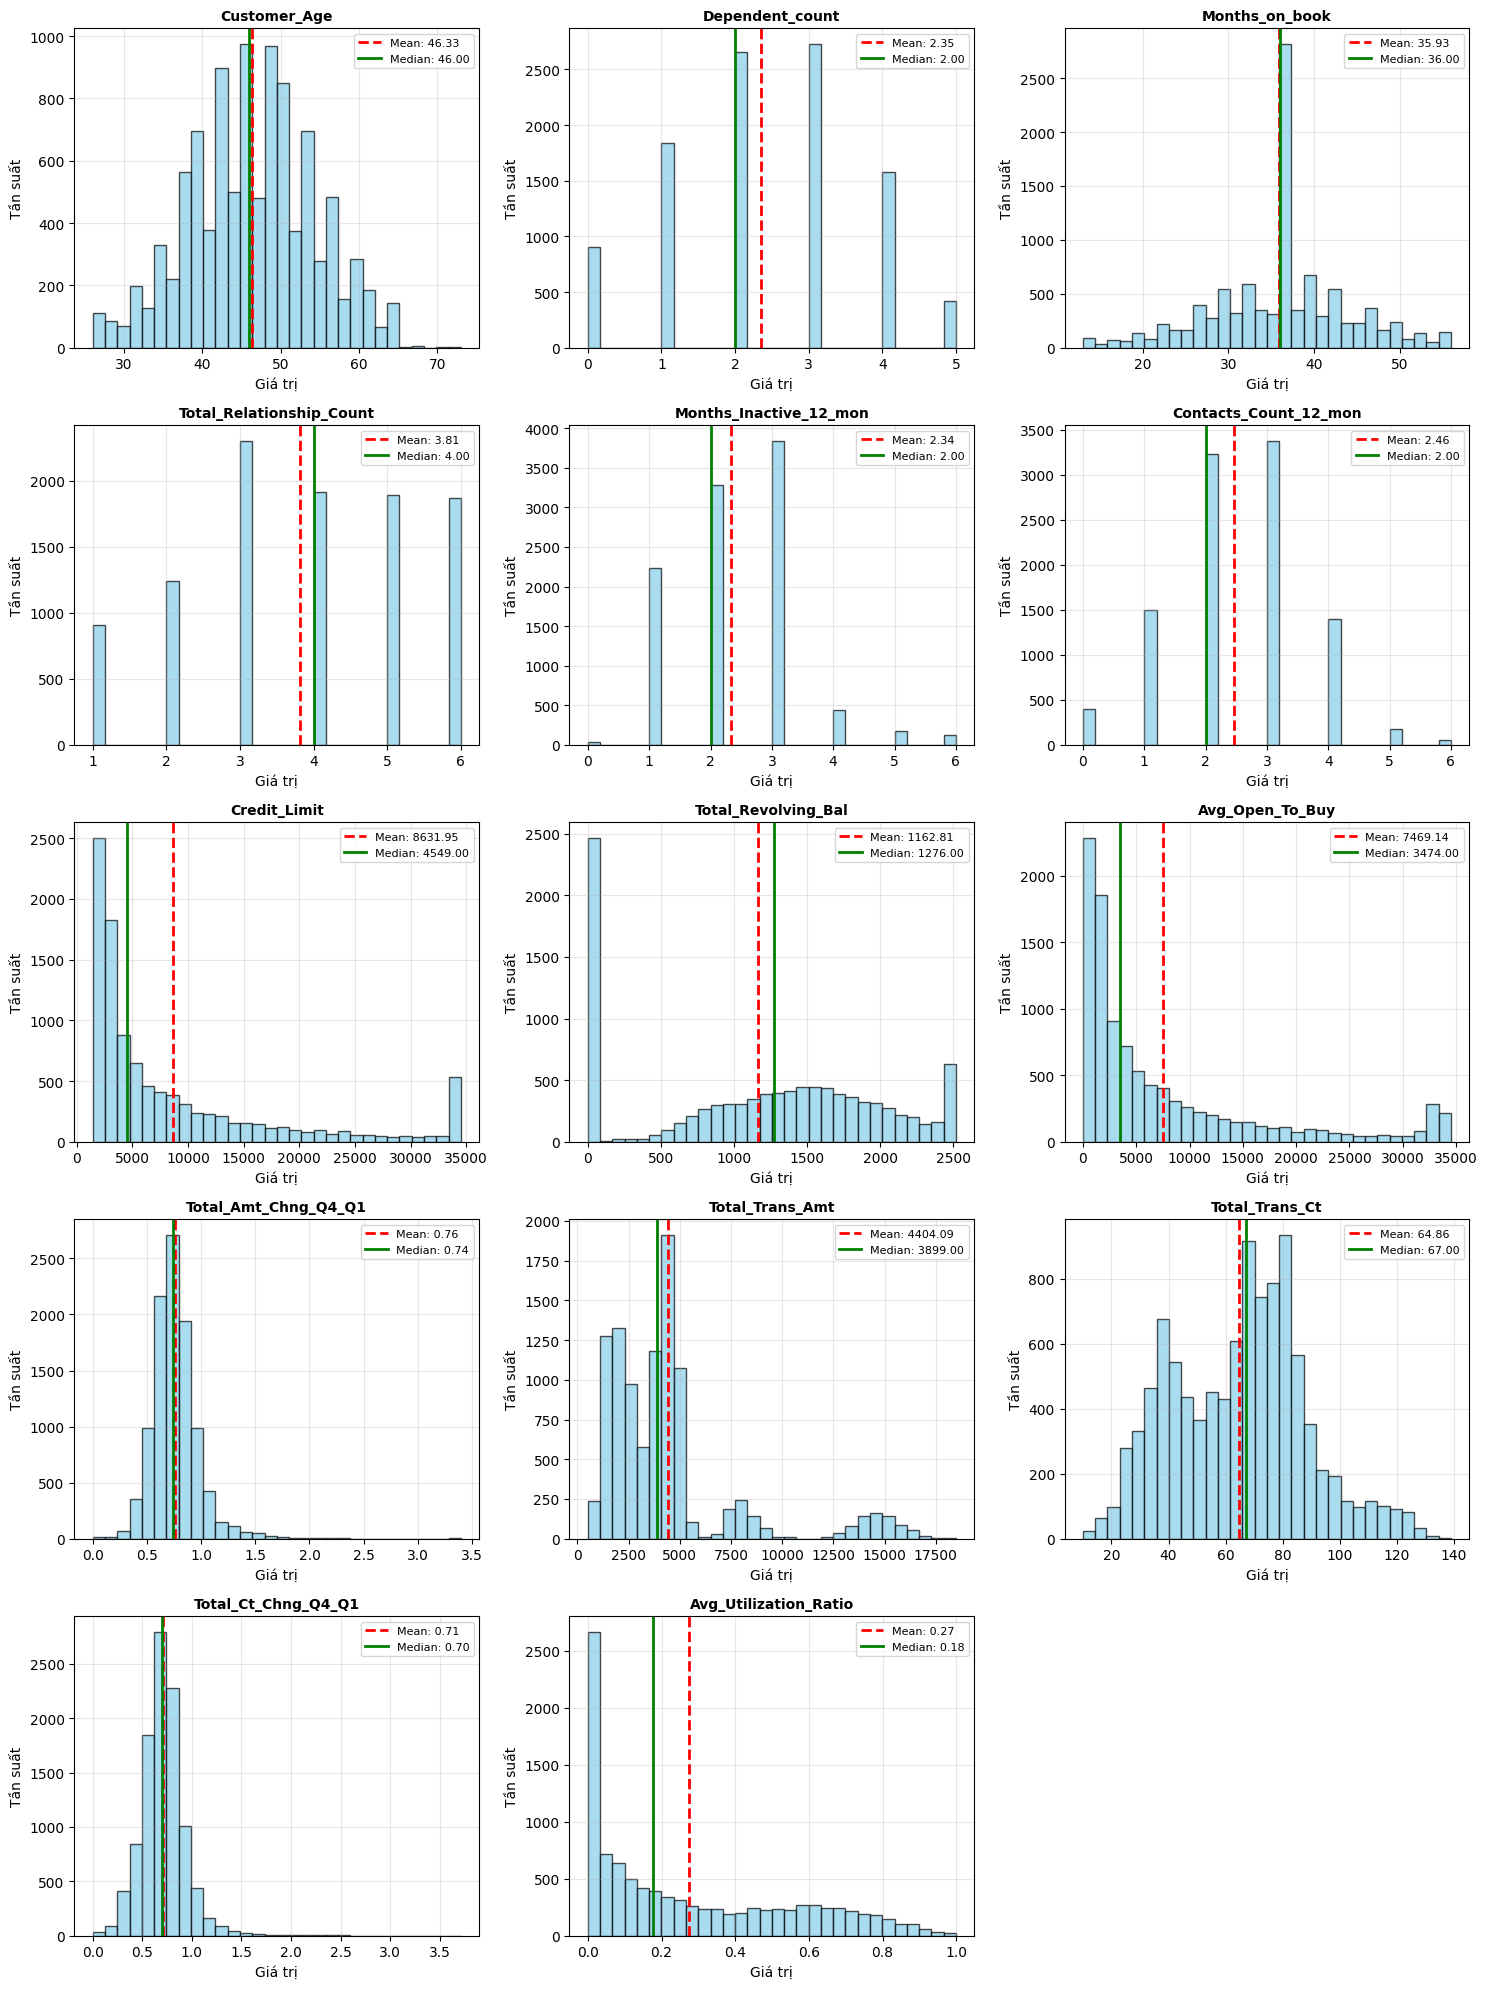

In [69]:
# Vẽ histogram cho tất cả các cột số
print("HISTOGRAM CHO CÁC CỘT SỐ")

# Tính số hàng và cột cho subplot
n_cols_plot = 3
n_rows_plot = (len(numeric_cols) + n_cols_plot - 1) // n_cols_plot

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    data = numeric_data[col]
    s = stats_summary[col]
    
    # Vẽ histogram
    ax.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Vẽ đường mean và median
    ax.axvline(s['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {s['mean']:.2f}")
    ax.axvline(s['median'], color='green', linestyle='-', linewidth=2, label=f"Median: {s['median']:.2f}")
    
    ax.set_title(f"{col}", fontsize=10, fontweight='bold')
    ax.set_xlabel('Giá trị')
    ax.set_ylabel('Tần suất')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Ẩn các subplot thừa
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

#### 4.1.2. Box Plot - Phát hiện outliers

VẼ BOX PLOT CHO CÁC CỘT SỐ


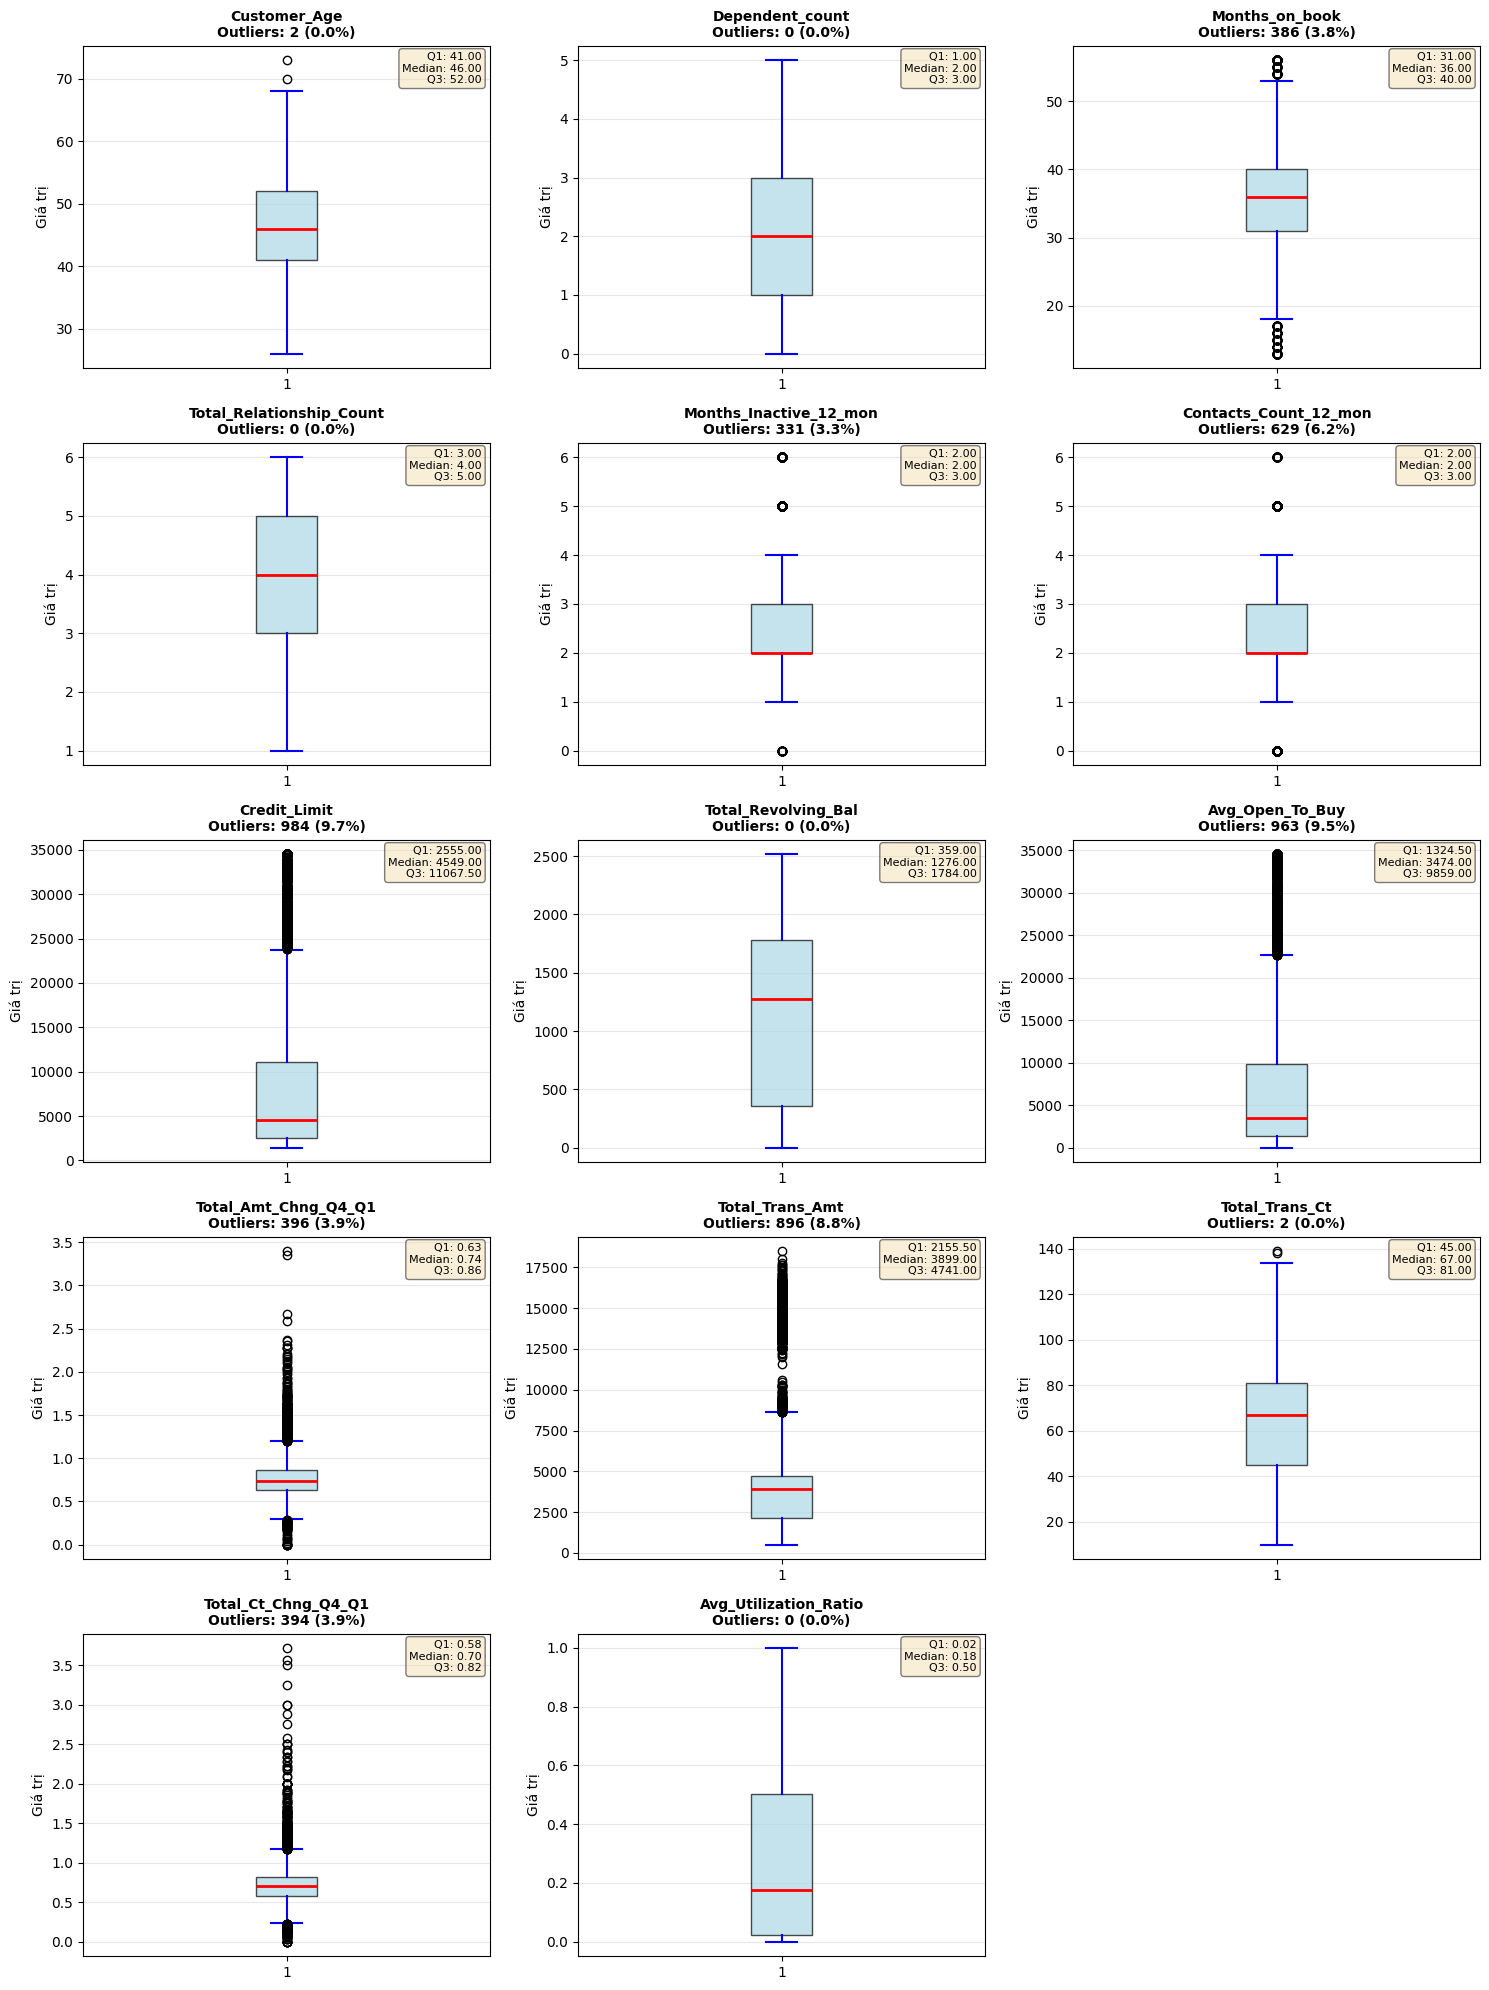

In [70]:
# Vẽ box plot cho tất cả các cột số
print("VẼ BOX PLOT CHO CÁC CỘT SỐ")

# Tính số hàng và cột cho subplot
fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 4))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    data = numeric_data[col]
    s = stats_summary[col]
    
    # Vẽ box plot
    bp = ax.boxplot(data, vert=True, patch_artist=True, 
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='blue', linewidth=1.5),
                     capprops=dict(color='blue', linewidth=1.5))
    
    # Tính outliers
    q1, q3 = s['q25'], s['q75']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    n_outliers = len(outliers)
    outlier_pct = (n_outliers / len(data)) * 100
    
    ax.set_title(f"{col}\nOutliers: {n_outliers} ({outlier_pct:.1f}%)", 
                 fontsize=10, fontweight='bold')
    ax.set_ylabel('Giá trị')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Thêm thông tin thống kê
    textstr = f'Q1: {q1:.2f}\nMedian: {s["median"]:.2f}\nQ3: {q3:.2f}'
    ax.text(0.98, 0.98, textstr, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Ẩn các subplot thừa
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


#### 4.1.3. Range & Outliers Analysis - Phân tích phạm vi và ngoại lệ

VẼ BIỂU ĐỒ SO SÁNH PHƯƠNG PHÁP PHÁT HIỆN OUTLIERS


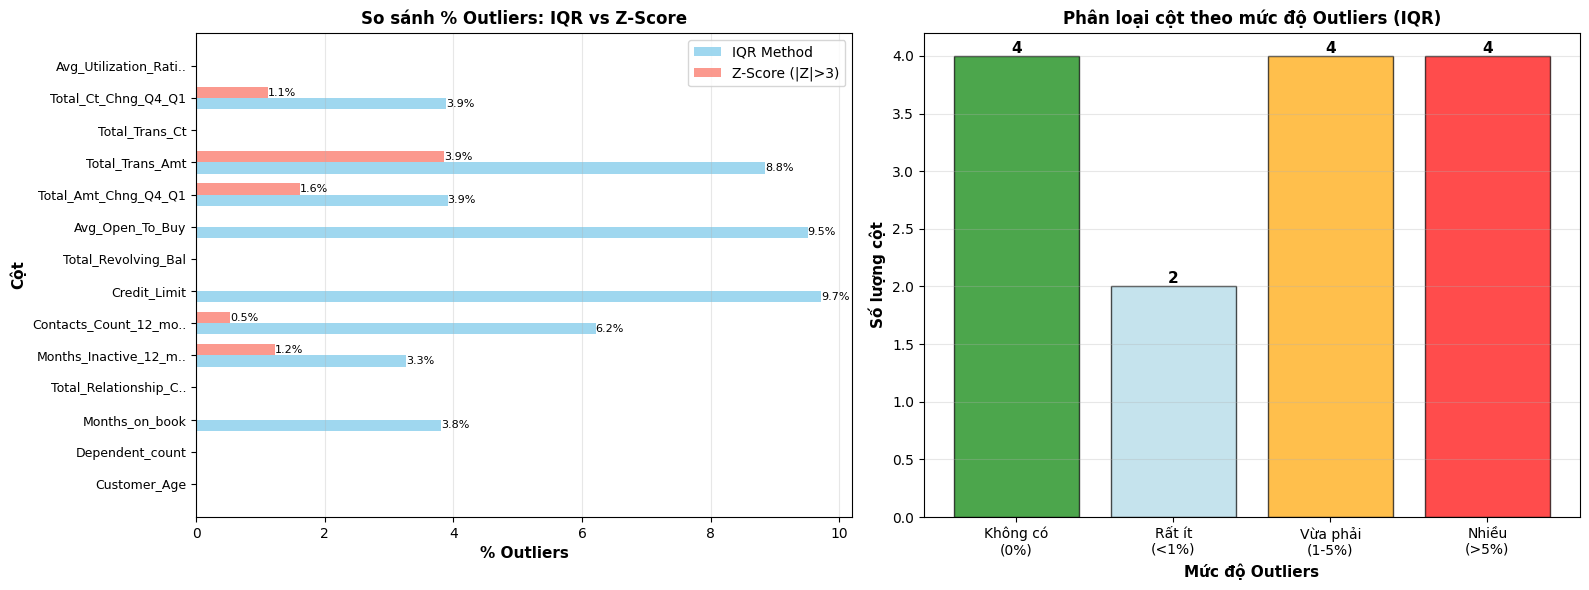

In [71]:
# VẼ BIỂU ĐỒ SO SÁNH OUTLIERS: IQR vs Z-SCORE
print("VẼ BIỂU ĐỒ SO SÁNH PHƯƠNG PHÁP PHÁT HIỆN OUTLIERS")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Dữ liệu cho biểu đồ
cols_list = []
iqr_outliers = []
zscore_outliers = []

for col in numeric_cols:
    info = outlier_analysis[col]
    cols_list.append(col[:20] + '..' if len(col) > 20 else col)
    iqr_outliers.append(info['pct_outliers_iqr'])
    zscore_outliers.append(info['pct_outliers_zscore'])

# Biểu đồ 1: So sánh % outliers IQR vs Z-score
x_pos = np.arange(len(cols_list))
width = 0.35

bars1 = ax1.barh(x_pos - width/2, iqr_outliers, width, label='IQR Method', color='skyblue', alpha=0.8)
bars2 = ax1.barh(x_pos + width/2, zscore_outliers, width, label='Z-Score (|Z|>3)', color='salmon', alpha=0.8)

ax1.set_xlabel('% Outliers', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cột', fontsize=11, fontweight='bold')
ax1.set_title('So sánh % Outliers: IQR vs Z-Score', fontsize=12, fontweight='bold')
ax1.set_yticks(x_pos)
ax1.set_yticklabels(cols_list, fontsize=9)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Thêm giá trị trên bars
for i, (v1, v2) in enumerate(zip(iqr_outliers, zscore_outliers)):
    if v1 > 0.1:
        ax1.text(v1, i - width/2, f'{v1:.1f}%', ha='left', va='center', fontsize=8)
    if v2 > 0.1:
        ax1.text(v2, i + width/2, f'{v2:.1f}%', ha='left', va='center', fontsize=8)

# Biểu đồ 2: Phân loại theo mức độ outliers
categories = ['Không có\n(0%)', 'Rất ít\n(<1%)', 'Vừa phải\n(1-5%)', 'Nhiều\n(>5%)']
counts = [0, 0, 0, 0]

for pct in iqr_outliers:
    if pct == 0:
        counts[0] += 1
    elif pct < 1:
        counts[1] += 1
    elif pct < 5:
        counts[2] += 1
    else:
        counts[3] += 1

colors_cat = ['green', 'lightblue', 'orange', 'red']
bars = ax2.bar(categories, counts, color=colors_cat, alpha=0.7, edgecolor='black')

ax2.set_ylabel('Số lượng cột', fontsize=11, fontweight='bold')
ax2.set_xlabel('Mức độ Outliers', fontsize=11, fontweight='bold')
ax2.set_title('Phân loại cột theo mức độ Outliers (IQR)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Thêm giá trị trên bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [72]:
# PHÂN TÍCH TÍNH HỢP LÝ CỦA MIN/MAX & ĐÁNH GIÁ OUTLIERS
print("="*100)
print("ĐÁNH GIÁ & PHÂN LOẠI OUTLIERS")
print("="*100)

print(f"\n{'Cột':<32} {'Min':>12} {'Max':>12} {'Outliers':^15} {'Đánh giá':^20}")
print("-"*100)

outlier_assessment = {}

for col in numeric_cols:
    info = outlier_analysis[col]
    
    # Phân loại outliers dựa trên dữ liệu thực tế
    if info['pct_outliers_iqr'] == 0:
        outlier_type = "Không có"
        assessment = "Bình thường"
    elif info['pct_outliers_iqr'] < 1:
        outlier_type = "Rất ít (<1%)"
        assessment = "Chấp nhận được"
    elif info['pct_outliers_iqr'] < 5:
        outlier_type = "Vừa phải (1-5%)"
        assessment = "Cần xem xét"
    else:
        outlier_type = f"Nhiều ({info['pct_outliers_iqr']:.1f}%)"
        assessment = "Cần xử lý"
    
    col_display = col[:30] + '..' if len(col) > 30 else col
    print(f"{col_display:<32} {info['min']:>12.2f} {info['max']:>12.2f} {outlier_type:^15} {assessment:^20}")
    
    outlier_assessment[col] = {
        'outlier_type': outlier_type,
        'assessment': assessment
    }

ĐÁNH GIÁ & PHÂN LOẠI OUTLIERS

Cột                                       Min          Max    Outliers           Đánh giá      
----------------------------------------------------------------------------------------------------
Customer_Age                            26.00        73.00  Rất ít (<1%)      Chấp nhận được   
Dependent_count                          0.00         5.00    Không có         Bình thường     
Months_on_book                          13.00        56.00 Vừa phải (1-5%)     Cần xem xét     
Total_Relationship_Count                 1.00         6.00    Không có         Bình thường     
Months_Inactive_12_mon                   0.00         6.00 Vừa phải (1-5%)     Cần xem xét     
Contacts_Count_12_mon                    0.00         6.00  Nhiều (6.2%)        Cần xử lý      
Credit_Limit                          1438.30     34516.00  Nhiều (9.7%)        Cần xử lý      
Total_Revolving_Bal                      0.00      2517.00    Không có         Bình thường     
Avg_

In [73]:
# PHÂN TÍCH RANGE & OUTLIERS CHI TIẾT
print("="*100)
print("PHÂN TÍCH RANGE & OUTLIERS CHO CÁC CỘT SỐ")
print("="*100)

# Tạo dictionary lưu thông tin outliers
outlier_analysis = {}

for col in numeric_cols:
    data = numeric_data[col]
    s = stats_summary[col]
    
    # Tính IQR và boundaries
    q1, q3 = s['q25'], s['q75']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Xác định outliers
    outliers_lower = data[data < lower_bound]
    outliers_upper = data[data > upper_bound]
    outliers_all = data[(data < lower_bound) | (data > upper_bound)]
    
    # Tính z-scores
    z_scores = np.abs((data - s['mean']) / s['std']) if s['std'] > 0 else np.zeros_like(data)
    outliers_zscore = data[z_scores > 3]
    
    # Lưu thông tin
    outlier_analysis[col] = {
        'min': s['min'],
        'max': s['max'],
        'range': s['max'] - s['min'],
        'iqr': iqr,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outliers_iqr': len(outliers_all),
        'n_outliers_lower': len(outliers_lower),
        'n_outliers_upper': len(outliers_upper),
        'pct_outliers_iqr': (len(outliers_all) / len(data)) * 100,
        'n_outliers_zscore': len(outliers_zscore),
        'pct_outliers_zscore': (len(outliers_zscore) / len(data)) * 100,
        'max_zscore': np.max(z_scores) if len(z_scores) > 0 else 0
    }

print(f"\n{'Cột':<32} {'Min':>12} {'Max':>12} {'Range':>12} {'IQR':>12}")
print("-"*100)
for col in numeric_cols:
    info = outlier_analysis[col]
    col_display = col[:30] + '..' if len(col) > 30 else col
    print(f"{col_display:<32} {info['min']:>12.2f} {info['max']:>12.2f} {info['range']:>12.2f} {info['iqr']:>12.2f}")

print("\n" + "="*100)
print("OUTLIERS - PHƯƠNG PHÁP IQR (Interquartile Range)")
print("="*100)
print(f"\n{'Cột':<32} {'Lower':>10} {'Upper':>10} {'#Lower':>8} {'#Upper':>8} {'Total':>8} {'%':>8}")
print("-"*100)
for col in numeric_cols:
    info = outlier_analysis[col]
    col_display = col[:30] + '..' if len(col) > 30 else col
    print(f"{col_display:<32} {info['lower_bound']:>10.2f} {info['upper_bound']:>10.2f} "
          f"{info['n_outliers_lower']:>8} {info['n_outliers_upper']:>8} "
          f"{info['n_outliers_iqr']:>8} {info['pct_outliers_iqr']:>7.1f}%")

print("\n" + "="*100)
print("OUTLIERS - PHƯƠNG PHÁP Z-SCORE (|Z| > 3)")
print("="*100)
print(f"\n{'Cột':<32} {'#Outliers':>12} {'%':>8} {'Max |Z|':>12}")
print("-"*100)
for col in numeric_cols:
    info = outlier_analysis[col]
    col_display = col[:30] + '..' if len(col) > 30 else col
    print(f"{col_display:<32} {info['n_outliers_zscore']:>12} "
          f"{info['pct_outliers_zscore']:>7.1f}% {info['max_zscore']:>12.2f}")

print("\n" + "="*100)

PHÂN TÍCH RANGE & OUTLIERS CHO CÁC CỘT SỐ

Cột                                       Min          Max        Range          IQR
----------------------------------------------------------------------------------------------------
Customer_Age                            26.00        73.00        47.00        11.00
Dependent_count                          0.00         5.00         5.00         2.00
Months_on_book                          13.00        56.00        43.00         9.00
Total_Relationship_Count                 1.00         6.00         5.00         2.00
Months_Inactive_12_mon                   0.00         6.00         6.00         1.00
Contacts_Count_12_mon                    0.00         6.00         6.00         1.00
Credit_Limit                          1438.30     34516.00     33077.70      8512.50
Total_Revolving_Bal                      0.00      2517.00      2517.00      1425.00
Avg_Open_To_Buy                          3.00     34516.00     34513.00      8534.50
Total_

#### 4.1.4. Data Quality - Chất lượng dữ liệu

VẼ BIỂU ĐỒ PHÂN TÍCH MISSING VALUES


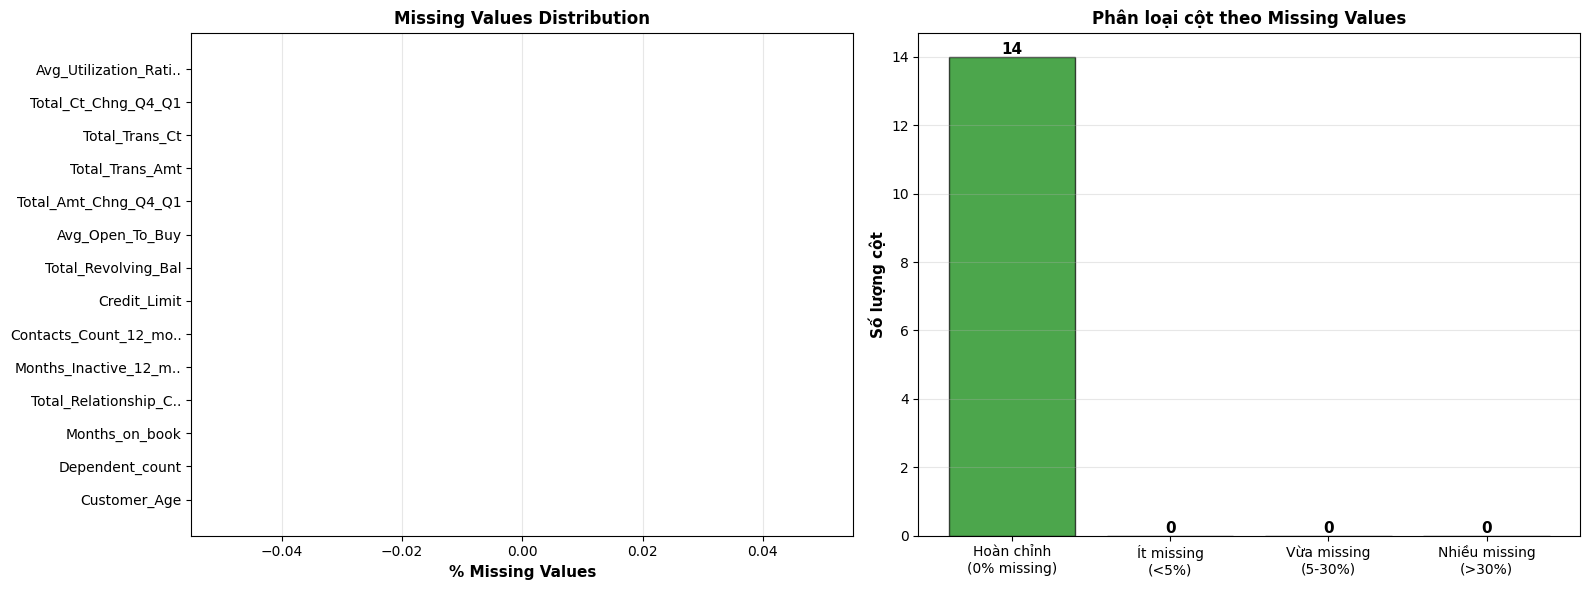

In [74]:
# VẼ BIỂU ĐỒ MISSING VALUES
print("VẼ BIỂU ĐỒ PHÂN TÍCH MISSING VALUES")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Missing Values Distribution
missing_pcts = [missing_analysis[col]['missing_pct'] for col in numeric_cols]
colors_missing = ['green' if pct == 0 else 'orange' if pct < 5 else 'red' for pct in missing_pcts]
cols_short = [col[:20] + '..' if len(col) > 20 else col for col in numeric_cols]

ax1.barh(cols_short, missing_pcts, color=colors_missing, alpha=0.7)
ax1.set_xlabel('% Missing Values', fontsize=11, fontweight='bold')
ax1.set_title('Missing Values Distribution', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Biểu đồ 2: Phân loại theo Missing Values
categories = ['Hoàn chỉnh\n(0% missing)', 'Ít missing\n(<5%)', 'Vừa missing\n(5-30%)', 'Nhiều missing\n(>30%)']
counts_missing = [
    sum(1 for info in missing_analysis.values() if info['missing_pct'] == 0),
    sum(1 for info in missing_analysis.values() if 0 < info['missing_pct'] < 5),
    sum(1 for info in missing_analysis.values() if 5 <= info['missing_pct'] < 30),
    sum(1 for info in missing_analysis.values() if info['missing_pct'] >= 30)
]

colors_summary = ['green', 'yellow', 'orange', 'red']
bars = ax2.bar(categories, counts_missing, color=colors_summary, alpha=0.7, edgecolor='black')

ax2.set_ylabel('Số lượng cột', fontsize=11, fontweight='bold')
ax2.set_title('Phân loại cột theo Missing Values', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Thêm giá trị trên bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [75]:
# PHÂN TÍCH MISSING VALUES (GIÁ TRỊ THIẾU)
print("="*80)
print("PHÂN TÍCH MISSING VALUES")
print("="*80)

# Tạo dictionary lưu thông tin missing values
missing_analysis = {}

for col in numeric_cols:
    col_idx = column_names.index(col)
    col_data_raw = raw_data[:, col_idx]
    
    # Đếm số lượng giá trị missing (empty, None, whitespace)
    missing_count = sum(1 for val in col_data_raw if val == '' or val is None or str(val).strip() == '')
    missing_pct = (missing_count / len(col_data_raw)) * 100
    
    missing_analysis[col] = {
        'missing_count': missing_count,
        'missing_pct': missing_pct,
        'total_count': len(col_data_raw)
    }

print(f"\n{'Cột':<32} {'Total':>10} {'Missing':>10} {'%':>10}")
print("-"*80)

for col in numeric_cols:
    info = missing_analysis[col]
    col_display = col[:30] + '..' if len(col) > 30 else col
    
    print(f"{col_display:<32} {info['total_count']:>10} {info['missing_count']:>10} "
          f"{info['missing_pct']:>9.2f}%")

print("\n" + "="*80)
print("KẾT LUẬN:")
total_missing = sum(info['missing_count'] for info in missing_analysis.values())
total_cells = sum(info['total_count'] for info in missing_analysis.values())
overall_missing_pct = (total_missing / total_cells) * 100 if total_cells > 0 else 0
print(f" - Tổng số missing values: {total_missing:,} / {total_cells:,} ({overall_missing_pct:.2f}%)")
print(f" - Số cột có missing: {sum(1 for info in missing_analysis.values() if info['missing_count'] > 0)}")
print(f" - Số cột hoàn chỉnh: {sum(1 for info in missing_analysis.values() if info['missing_count'] == 0)}")
print("="*80)

PHÂN TÍCH MISSING VALUES

Cột                                   Total    Missing          %
--------------------------------------------------------------------------------
Customer_Age                          10127          0      0.00%
Dependent_count                       10127          0      0.00%
Months_on_book                        10127          0      0.00%
Total_Relationship_Count              10127          0      0.00%
Months_Inactive_12_mon                10127          0      0.00%
Contacts_Count_12_mon                 10127          0      0.00%
Credit_Limit                          10127          0      0.00%
Total_Revolving_Bal                   10127          0      0.00%
Avg_Open_To_Buy                       10127          0      0.00%
Total_Amt_Chng_Q4_Q1                  10127          0      0.00%
Total_Trans_Amt                       10127          0      0.00%
Total_Trans_Ct                        10127          0      0.00%
Total_Ct_Chng_Q4_Q1                

## 5. Categorical Columns Analysis (Phân tích các cột phân loại)

### 5.1. Value Distribution (Phân bố giá trị)

In [76]:
# PHÂN TÍCH VALUE DISTRIBUTION CHO CÁC CỘT CATEGORICAL
print("="*80)
print("PHÂN TÍCH VALUE DISTRIBUTION - CÁC CỘT CATEGORICAL")
print("="*80)

# Tạo dictionary lưu thông tin về distribution
categorical_distribution = {}

for col in categorical_cols:
    col_idx = column_names.index(col)
    col_data = raw_data[:, col_idx]
    
    # Đếm tần suất của từng giá trị
    value_counts = {}
    for val in col_data:
        val_str = str(val).strip()
        if val_str != '' and val_str != 'None':
            value_counts[val_str] = value_counts.get(val_str, 0) + 1
    
    # Sắp xếp theo tần suất giảm dần
    sorted_values = sorted(value_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Tính phần trăm
    total_count = sum(value_counts.values())
    value_percentages = [(val, count, (count/total_count)*100) for val, count in sorted_values]
    
    categorical_distribution[col] = {
        'unique_count': len(value_counts),
        'total_count': total_count,
        'value_counts': dict(sorted_values),
        'value_percentages': value_percentages,
        'top_5': value_percentages[:5]
    }
    
    print(f"CỘT: {col}")
    print(f"{'='*80}")
    print(f"Tổng số giá trị: {total_count:,}")
    print(f"Số giá trị duy nhất (unique): {len(value_counts)}")
    print(f"\nTop 10 giá trị xuất hiện nhiều nhất:")
    print(f"{'Giá trị':<30} {'Số lượng':>15} {'Tỷ lệ (%)':>15}")
    print("-"*80)
    
    for val, count, pct in value_percentages[:10]:
        val_display = val[:28] + '..' if len(val) > 28 else val
        print(f"{val_display:<30} {count:>15,} {pct:>14.2f}%")
    
    # Kiểm tra cân bằng
    if len(value_counts) > 0:
        max_pct = value_percentages[0][2]
        min_pct = value_percentages[-1][2]
        balance_ratio = max_pct / min_pct if min_pct > 0 else float('inf')
        
        print(f"\nĐÁNH GIÁ CÂN BẰNG:")
        if len(value_counts) <= 2:
            if max_pct > 90:
                print(f"RẤT MẤT CÂN BẰNG - Giá trị phổ biến nhất chiếm {max_pct:.2f}%")
            elif max_pct > 70:
                print(f"MẤT CÂN BẰNG - Giá trị phổ biến nhất chiếm {max_pct:.2f}%")
            else:
                print(f"CÂN BẰNG TỐT - Phân bố tương đối đều ({max_pct:.2f}% vs {100-max_pct:.2f}%)")
        else:
            if max_pct > 50:
                print(f"MẤT CÂN BẰNG - Giá trị phổ biến nhất chiếm {max_pct:.2f}%")
            else:
                print(f"CÂN BẰNG TỐT - Phân bố tương đối đều (max: {max_pct:.2f}%)")

print("\n" + "="*80)
print("TÓM TẮT:")
print("="*80)
print(f"{'Cột':<30} {'Unique':>10} {'Balanced?':>15}")
print("-"*80)
for col in categorical_cols:
    info = categorical_distribution[col]
    max_pct = info['value_percentages'][0][2] if info['value_percentages'] else 0
    
    if max_pct > 70:
        balance_status = "Imbalanced"
    elif max_pct > 50:
        balance_status = "Slightly Off"
    else:
        balance_status = "Balanced"
    
    print(f"{col:<30} {info['unique_count']:>10} {balance_status:>15}")
print("="*80)

PHÂN TÍCH VALUE DISTRIBUTION - CÁC CỘT CATEGORICAL
CỘT: Attrition_Flag
Tổng số giá trị: 10,127
Số giá trị duy nhất (unique): 2

Top 10 giá trị xuất hiện nhiều nhất:
Giá trị                               Số lượng       Tỷ lệ (%)
--------------------------------------------------------------------------------
Existing Customer                        8,500          83.93%
Attrited Customer                        1,627          16.07%

ĐÁNH GIÁ CÂN BẰNG:
MẤT CÂN BẰNG - Giá trị phổ biến nhất chiếm 83.93%
CỘT: Gender
Tổng số giá trị: 10,127
Số giá trị duy nhất (unique): 2

Top 10 giá trị xuất hiện nhiều nhất:
Giá trị                               Số lượng       Tỷ lệ (%)
--------------------------------------------------------------------------------
F                                        5,358          52.91%
M                                        4,769          47.09%

ĐÁNH GIÁ CÂN BẰNG:
CÂN BẰNG TỐT - Phân bố tương đối đều (52.91% vs 47.09%)
CỘT: Education_Level
Tổng số giá trị: 10,12

VẼ BIỂU ĐỒ PHÂN TÍCH CÂN BẰNG


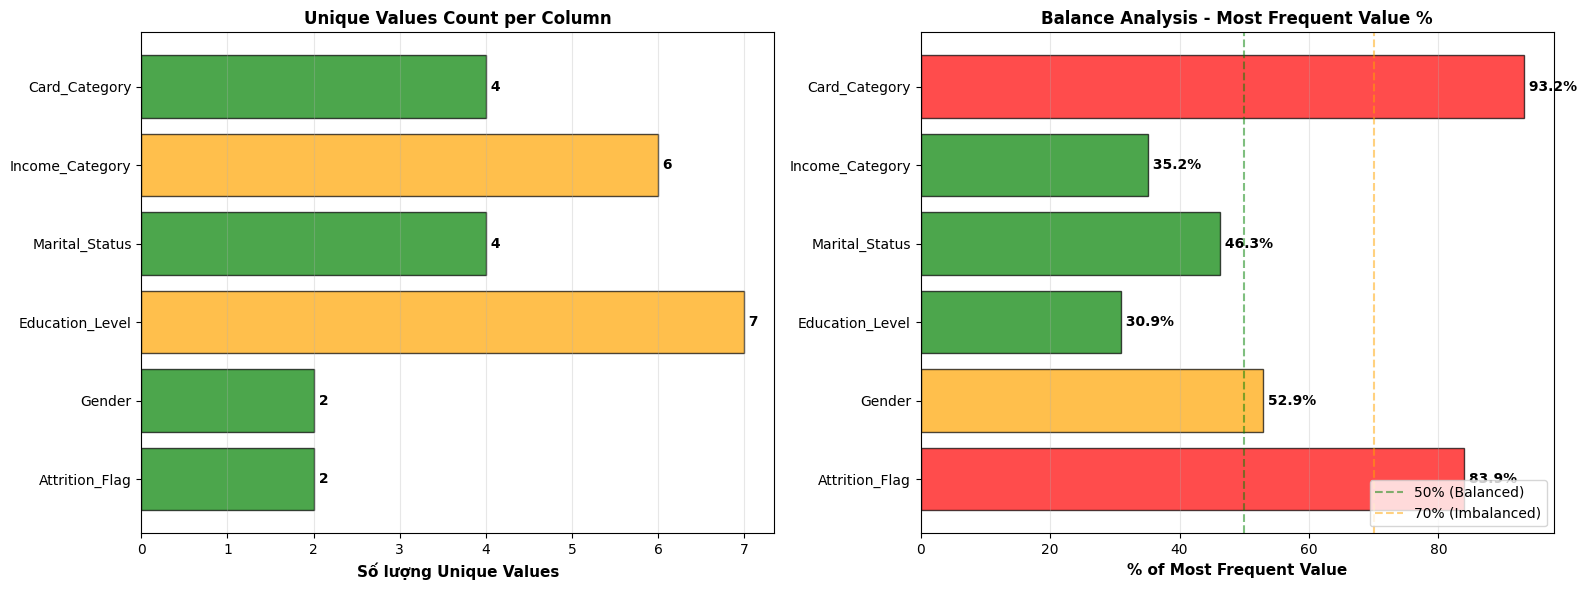

In [77]:
# VẼ BIỂU ĐỒ TỔNG QUAN - BALANCE ANALYSIS
print("VẼ BIỂU ĐỒ PHÂN TÍCH CÂN BẰNG")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Unique Values Count
unique_counts = [categorical_distribution[col]['unique_count'] for col in categorical_cols]
cols_short = [col[:20] + '..' if len(col) > 20 else col for col in categorical_cols]

colors_unique = ['green' if u <= 5 else 'orange' if u <= 10 else 'red' for u in unique_counts]
bars1 = ax1.barh(cols_short, unique_counts, color=colors_unique, alpha=0.7, edgecolor='black')

ax1.set_xlabel('Số lượng Unique Values', fontsize=11, fontweight='bold')
ax1.set_title('Unique Values Count per Column', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Thêm giá trị
for i, (bar, count) in enumerate(zip(bars1, unique_counts)):
    ax1.text(count, bar.get_y() + bar.get_height()/2.,
             f' {count}',
             ha='left', va='center', fontsize=10, fontweight='bold')

# Biểu đồ 2: Balance Analysis (Max % trong mỗi cột)
max_percentages = [categorical_distribution[col]['value_percentages'][0][2] 
                   if categorical_distribution[col]['value_percentages'] else 0 
                   for col in categorical_cols]

colors_balance = ['green' if p <= 50 else 'orange' if p <= 70 else 'red' for p in max_percentages]
bars2 = ax2.barh(cols_short, max_percentages, color=colors_balance, alpha=0.7, edgecolor='black')

ax2.set_xlabel('% of Most Frequent Value', fontsize=11, fontweight='bold')
ax2.set_title('Balance Analysis - Most Frequent Value %', fontsize=12, fontweight='bold')
ax2.axvline(50, color='green', linestyle='--', linewidth=1.5, alpha=0.5, label='50% (Balanced)')
ax2.axvline(70, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='70% (Imbalanced)')
ax2.grid(True, alpha=0.3, axis='x')
ax2.legend(loc='lower right')

# Thêm giá trị
for i, (bar, pct) in enumerate(zip(bars2, max_percentages)):
    ax2.text(pct, bar.get_y() + bar.get_height()/2.,
             f' {pct:.1f}%',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

VẼ PIE CHARTS CHO CÁC CỘT CATEGORICAL (≤ 8 unique values)


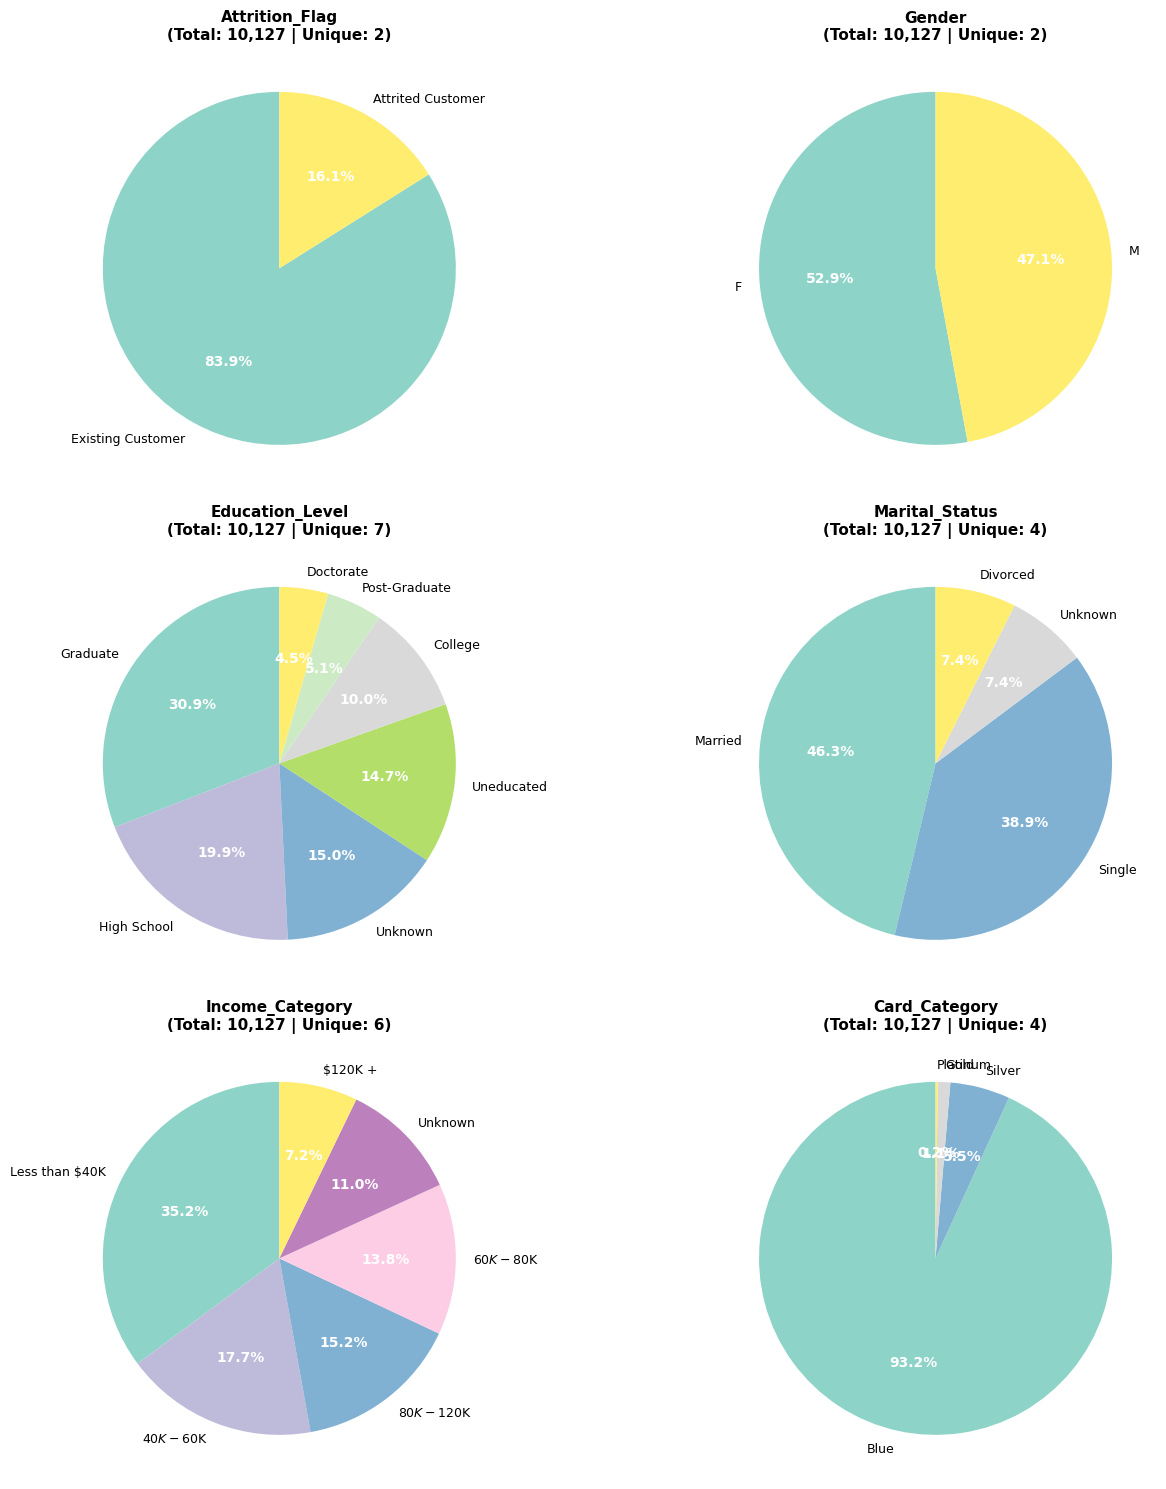

In [78]:
# VẼ PIE CHARTS CHO CÁC CỘT CATEGORICAL (CHỈ CÁC CỘT CÓ ÍT UNIQUE VALUES)
print("VẼ PIE CHARTS CHO CÁC CỘT CATEGORICAL (≤ 8 unique values)")

# Lọc các cột có ít unique values (phù hợp với pie chart)
pie_chart_cols = [col for col in categorical_cols if categorical_distribution[col]['unique_count'] <= 8]

if len(pie_chart_cols) > 0:
    n_cols_plot = 2
    n_rows_plot = (len(pie_chart_cols) + n_cols_plot - 1) // n_cols_plot
    
    fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(14, n_rows_plot * 5))
    axes = axes.flatten() if len(pie_chart_cols) > 1 else [axes]
    
    for idx, col in enumerate(pie_chart_cols):
        ax = axes[idx]
        info = categorical_distribution[col]
        
        values = [item[0] for item in info['value_percentages']]
        counts = [item[1] for item in info['value_percentages']]
        percentages = [item[2] for item in info['value_percentages']]
        
        # Rút ngắn label
        values_display = [v[:20] + '..' if len(v) > 20 else v for v in values]
        
        # Tạo màu sắc
        colors = plt.cm.Set3(np.linspace(0, 1, len(values)))
        
        # Vẽ pie chart
        wedges, texts, autotexts = ax.pie(counts, labels=values_display, autopct='%1.1f%%',
                                            colors=colors, startangle=90,
                                            textprops={'fontsize': 9})
        
        # Làm đậm phần trăm
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)
        
        ax.set_title(f"{col}\n(Total: {info['total_count']:,} | Unique: {info['unique_count']})",
                     fontsize=11, fontweight='bold')
    
    # Ẩn các subplot thừa
    for idx in range(len(pie_chart_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("Không có cột nào phù hợp cho Pie Chart (tất cả có > 8 unique values)")

VẼ BAR CHARTS CHO CÁC CỘT CATEGORICAL


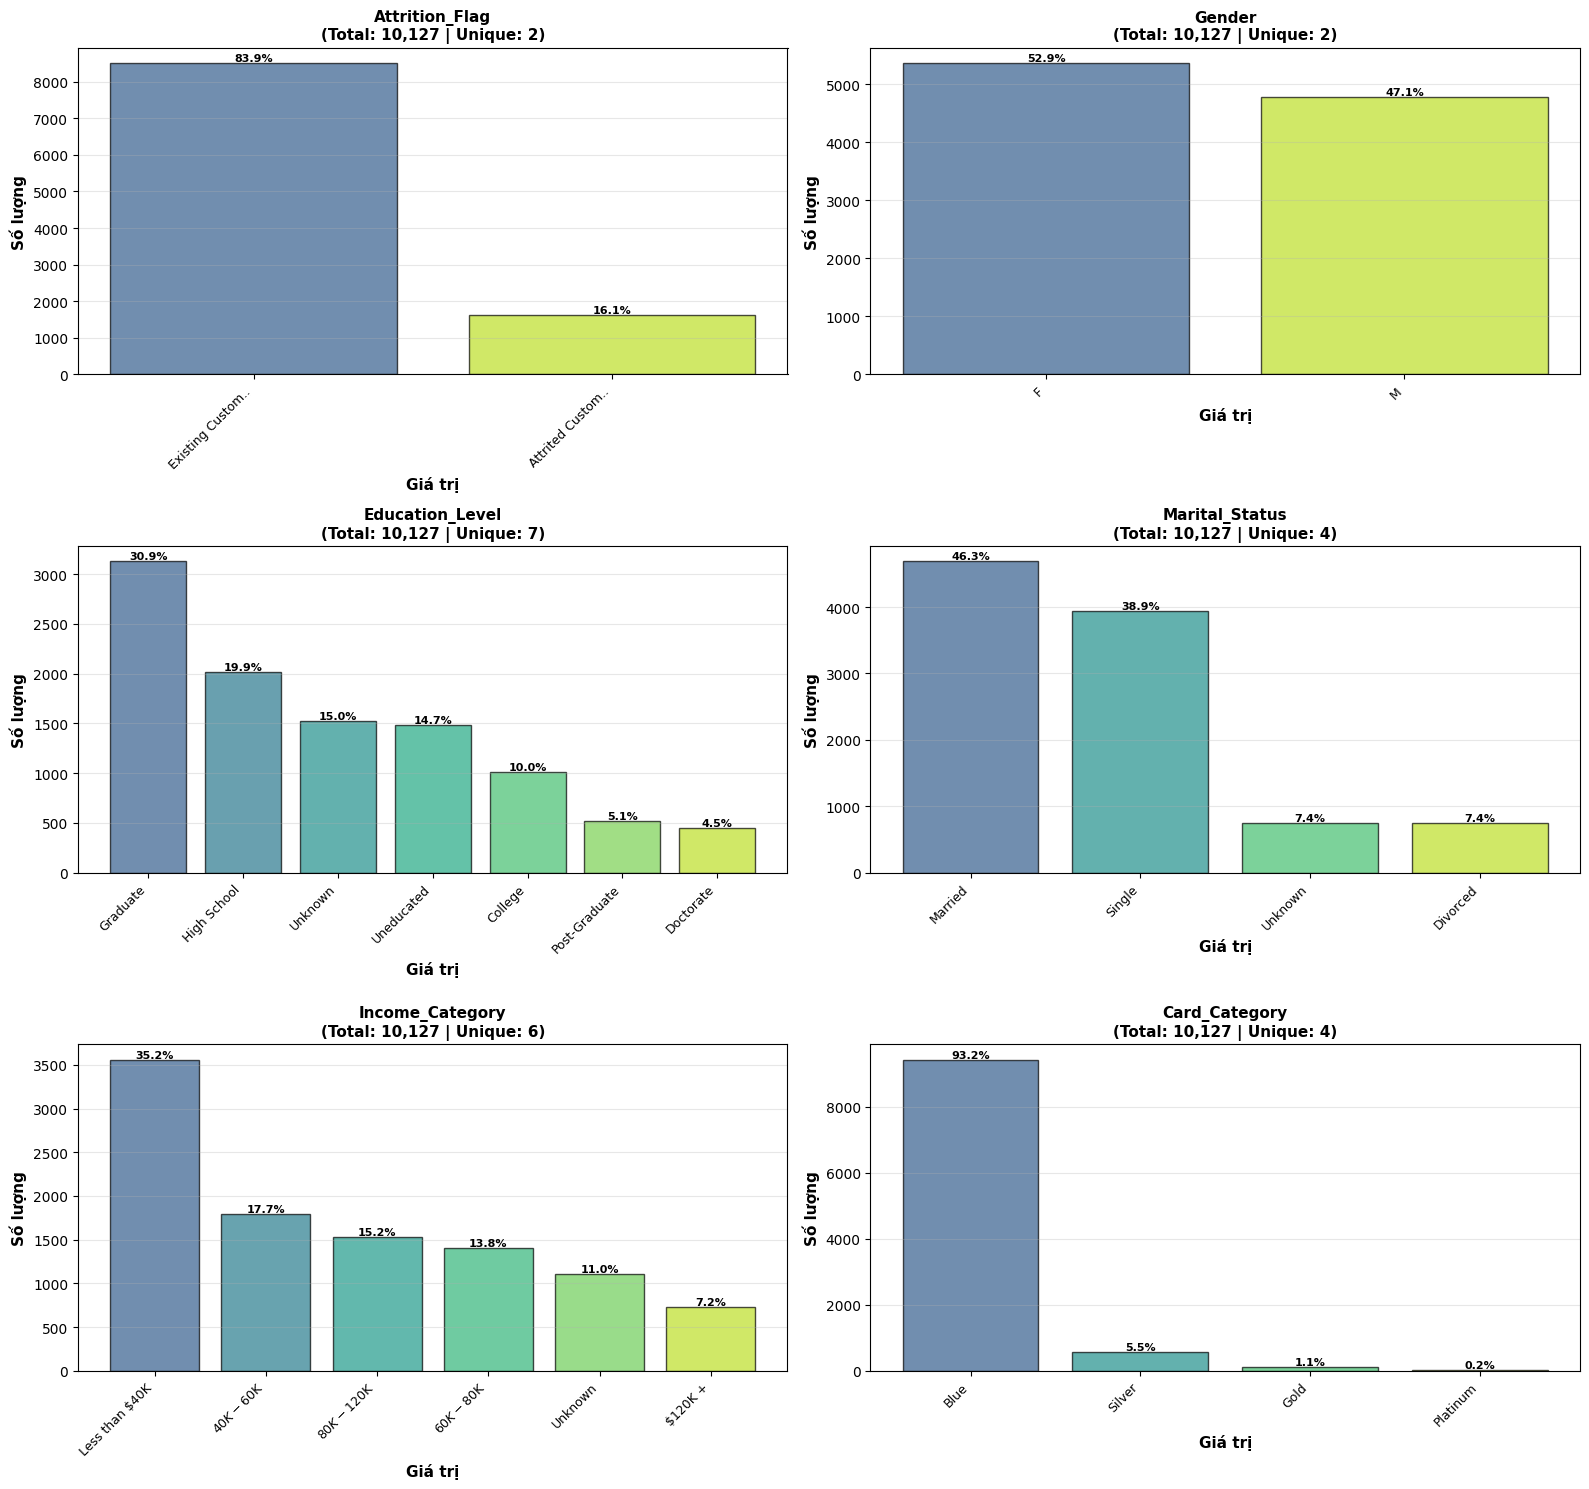

In [79]:
# VẼ BAR CHARTS CHO CÁC CỘT CATEGORICAL
print("VẼ BAR CHARTS CHO CÁC CỘT CATEGORICAL")

# Tính số hàng và cột cho subplot
n_cols_plot = 2
n_rows_plot = (len(categorical_cols) + n_cols_plot - 1) // n_cols_plot

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(16, n_rows_plot * 5))
axes = axes.flatten() if len(categorical_cols) > 1 else [axes]

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    info = categorical_distribution[col]
    
    # Lấy top 10 hoặc tất cả nếu ít hơn 10
    top_values = info['value_percentages'][:min(10, len(info['value_percentages']))]
    
    values = [item[0] for item in top_values]
    counts = [item[1] for item in top_values]
    percentages = [item[2] for item in top_values]
    
    # Rút ngắn label nếu quá dài
    values_display = [v[:15] + '..' if len(v) > 15 else v for v in values]
    
    # Tạo màu sắc gradient
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(values)))
    
    # Vẽ bar chart
    bars = ax.bar(range(len(values)), counts, color=colors, alpha=0.7, edgecolor='black')
    
    # Thêm labels
    ax.set_xlabel('Giá trị', fontsize=11, fontweight='bold')
    ax.set_ylabel('Số lượng', fontsize=11, fontweight='bold')
    ax.set_title(f"{col}\n(Total: {info['total_count']:,} | Unique: {info['unique_count']})", 
                 fontsize=11, fontweight='bold')
    ax.set_xticks(range(len(values)))
    ax.set_xticklabels(values_display, rotation=45, ha='right', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Thêm phần trăm trên mỗi bar
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{pct:.1f}%',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# Ẩn các subplot thừa
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

### 5.2. Data Quality (Chất lượng dữ liệu categorical)

In [80]:
# PHÂN TÍCH MISSING VALUES CHO CÁC CỘT CATEGORICAL
# LƯU Ý: Trong dataset này, missing values được biểu diễn bằng chuỗi 'Unknown'
print("="*80)
print("1. PHÂN TÍCH MISSING VALUES - CATEGORICAL COLUMNS")
print("="*80)

categorical_missing = {}

for col in categorical_cols:
    col_idx = column_names.index(col)
    col_data_raw = raw_data[:, col_idx]
    
    # Đếm missing values - trong dataset này là 'Unknown'
    # Cũng kiểm tra cả empty string và các variant khác
    missing_count = sum(1 for val in col_data_raw 
                       if val == 'Unknown' or val == '' or val is None 
                       or str(val).strip() == '' 
                       or str(val).upper() in ['NA', 'N/A', 'NAN', 'NULL', 'NONE']
                       or str(val) == '?')
    missing_pct = (missing_count / len(col_data_raw)) * 100
    
    # Đếm riêng số lượng 'Unknown'
    unknown_count = sum(1 for val in col_data_raw if val == 'Unknown')
    
    categorical_missing[col] = {
        'missing_count': missing_count,
        'unknown_count': unknown_count,
        'missing_pct': missing_pct,
        'total_count': len(col_data_raw)
    }

print(f"\n{'Cột':<30} {'Total':>10} {'Unknown':>10} {'Missing':>10} {'%':>10}")
print("-"*80)

for col in categorical_cols:
    info = categorical_missing[col]
    
    print(f"{col:<30} {info['total_count']:>10} {info['unknown_count']:>10} {info['missing_count']:>10} "
          f"{info['missing_pct']:>9.2f}%")

print("\n" + "="*80)
total_cat_missing = sum(info['missing_count'] for info in categorical_missing.values())
total_cat_cells = sum(info['total_count'] for info in categorical_missing.values())
overall_cat_missing_pct = (total_cat_missing / total_cat_cells) * 100 if total_cat_cells > 0 else 0

print("KẾT LUẬN:")
print(f" - Tổng missing (Unknown): {total_cat_missing:,} / {total_cat_cells:,} ({overall_cat_missing_pct:.2f}%)")
print(f" - Cột có missing: {sum(1 for info in categorical_missing.values() if info['missing_count'] > 0)}")
print(f" - Cột hoàn chỉnh: {sum(1 for info in categorical_missing.values() if info['missing_count'] == 0)}")
print("="*80)

1. PHÂN TÍCH MISSING VALUES - CATEGORICAL COLUMNS

Cột                                 Total    Unknown    Missing          %
--------------------------------------------------------------------------------
Attrition_Flag                      10127          0          0      0.00%
Gender                              10127          0          0      0.00%
Education_Level                     10127       1519       1519     15.00%
Marital_Status                      10127        749        749      7.40%
Income_Category                     10127       1112       1112     10.98%
Card_Category                       10127          0          0      0.00%

KẾT LUẬN:
 - Tổng missing (Unknown): 3,380 / 60,762 (5.56%)
 - Cột có missing: 3
 - Cột hoàn chỉnh: 3


In [81]:
# PHÂN TÍCH INCONSISTENCIES - BIẾN THỂ VÀ SAI SÓT
print("\n" + "="*100)
print("2. PHÂN TÍCH INCONSISTENCIES - Biến thể và Sai sót")
print("="*100)

inconsistency_analysis = {}

for col in categorical_cols:
    col_idx = column_names.index(col)
    col_data = raw_data[:, col_idx]
    
    # Lấy tất cả giá trị không rỗng
    values = [str(val).strip() for val in col_data if str(val).strip() != '' and str(val).strip() != 'None']
    unique_values = set(values)
    
    # Phân tích các vấn đề tiềm ẩn
    issues = {
        'case_variations': [],      # Biến thể chữ hoa/thường
        'whitespace_issues': [],    # Vấn đề khoảng trắng
        'similar_values': []        # Giá trị tương tự (có thể là typo)
    }
    
    # Tạo dictionary để nhóm các giá trị theo lowercase
    lowercase_groups = {}
    for val in unique_values:
        lower_val = val.lower()
        if lower_val not in lowercase_groups:
            lowercase_groups[lower_val] = []
        lowercase_groups[lower_val].append(val)
    
    # Tìm case variations (nhiều hơn 1 biến thể cho cùng 1 giá trị lowercase)
    for lower_val, variants in lowercase_groups.items():
        if len(variants) > 1:
            issues['case_variations'].append({
                'variants': sorted(variants),
                'count': len(variants)
            })
    
    # Kiểm tra whitespace issues (giá trị có khoảng trắng thừa)
    for val in unique_values:
        if val != val.strip() or '  ' in val:  # Leading/trailing hoặc double spaces
            issues['whitespace_issues'].append(val)
    
    # Tìm giá trị tương tự (có thể là typo) - chỉ với cột có ít unique values
    if len(unique_values) <= 20:
        checked_pairs = set()
        for val1 in unique_values:
            for val2 in unique_values:
                if val1 != val2:
                    pair = tuple(sorted([val1, val2]))
                    if pair not in checked_pairs:
                        checked_pairs.add(pair)
                        # So sánh độ tương đồng đơn giản
                        if len(val1) > 3 and len(val2) > 3:
                            # Kiểm tra nếu một chuỗi là substring của chuỗi kia
                            if val1.lower() in val2.lower() or val2.lower() in val1.lower():
                                issues['similar_values'].append({
                                    'pair': [val1, val2],
                                    'reason': 'substring'
                                })
    
    inconsistency_analysis[col] = issues
    
    # Hiển thị kết quả
    print(f"CỘT: {col}")

    has_issues = False
    
    # Case variations
    if issues['case_variations']:
        has_issues = True
        print(f"\nCASE VARIATIONS ({len(issues['case_variations'])} nhóm):")
        for item in issues['case_variations'][:5]:  # Hiển thị top 5
            print(f"  • {', '.join(item['variants'])}")
    
    # Whitespace issues
    if issues['whitespace_issues']:
        has_issues = True
        print(f"\nWHITESPACE ISSUES ({len(issues['whitespace_issues'])} giá trị):")
        for val in issues['whitespace_issues'][:5]:
            print(f"  • '{val}'")
    
    # Similar values
    if issues['similar_values']:
        has_issues = True
        print(f"SIMILAR VALUES ({len(issues['similar_values'])} cặp):")
        for item in issues['similar_values'][:5]:
            print(f" - '{item['pair'][0]}' <-> '{item['pair'][1]}' ({item['reason']})")
    
    if not has_issues:
        print("KHÔNG CÓ INCONSISTENCIES ĐƯỢC PHÁT HIỆN")
    print(f"{'-'*100}")



2. PHÂN TÍCH INCONSISTENCIES - Biến thể và Sai sót
CỘT: Attrition_Flag
KHÔNG CÓ INCONSISTENCIES ĐƯỢC PHÁT HIỆN
----------------------------------------------------------------------------------------------------
CỘT: Gender
KHÔNG CÓ INCONSISTENCIES ĐƯỢC PHÁT HIỆN
----------------------------------------------------------------------------------------------------
CỘT: Education_Level
SIMILAR VALUES (1 cặp):
 - 'Post-Graduate' <-> 'Graduate' (substring)
----------------------------------------------------------------------------------------------------
CỘT: Marital_Status
KHÔNG CÓ INCONSISTENCIES ĐƯỢC PHÁT HIỆN
----------------------------------------------------------------------------------------------------
CỘT: Income_Category
KHÔNG CÓ INCONSISTENCIES ĐƯỢC PHÁT HIỆN
----------------------------------------------------------------------------------------------------
CỘT: Card_Category
KHÔNG CÓ INCONSISTENCIES ĐƯỢC PHÁT HIỆN
------------------------------------------------------------

In [82]:
# PHÂN TÍCH RARE CATEGORIES - CÁC CATEGORY CÓ ÍT QUAN SÁT
print("\n" + "="*100)
print("3. PHÂN TÍCH RARE CATEGORIES - Categories có ít quan sát")
print("="*100)

rare_categories_analysis = {}

# Ngưỡng để xác định rare category
RARE_THRESHOLD_PCT = 1.0  # <1% được coi là rare
RARE_THRESHOLD_COUNT = 50  # <50 quan sát được coi là rare

for col in categorical_cols:
    info = categorical_distribution[col]
    rare_categories = []
    
    for val, count, pct in info['value_percentages']:
        if pct < RARE_THRESHOLD_PCT or count < RARE_THRESHOLD_COUNT:
            rare_categories.append({
                'value': val,
                'count': count,
                'pct': pct
            })
    
    rare_categories_analysis[col] = {
        'rare_categories': rare_categories,
        'n_rare': len(rare_categories),
        'total_categories': info['unique_count'],
        'pct_rare': (len(rare_categories) / info['unique_count'] * 100) if info['unique_count'] > 0 else 0
    }
    
    print(f"\n{'='*100}")
    print(f"CỘT: {col}")
    print(f"Tổng categories: {info['unique_count']}")
    print(f"Rare categories: {len(rare_categories)} ({rare_categories_analysis[col]['pct_rare']:.1f}%)")
    
    if rare_categories:
        print(f"\nDanh sách Rare Categories (<{RARE_THRESHOLD_PCT}% hoặc <{RARE_THRESHOLD_COUNT} quan sát):")
        print(f"{'Giá trị':<30} {'Count':>10} {'%':>10}")
        print("-"*100)
        
        for item in rare_categories[:15]:  # Hiển thị top 15
            val_display = item['value'][:28] + '..' if len(item['value']) > 28 else item['value']
            print(f"{val_display:<30} {item['count']:>10,} {item['pct']:>9.2f}%")
        
        if len(rare_categories) > 15:
            print(f"... và {len(rare_categories) - 15} categories khác")
    else:
        print("KHÔNG CÓ RARE CATEGORIES")

print("\n" + "="*100)
print("TÓM TẮT RARE CATEGORIES:")
print("="*100)
print(f"{'Cột':<30} {'Total':>10} {'Rare':>10} {'% Rare':>10} {'Đề xuất':>20}")
print("-"*100)
for col in categorical_cols:
    info = rare_categories_analysis[col]
    
    if info['n_rare'] > 5:
        suggestion = " Nên gộp nhóm"
    elif info['n_rare'] > 0:
        suggestion = " Xem xét gộp"
    else:
        suggestion = " OK"
    
    print(f"{col:<30} {info['total_categories']:>10} {info['n_rare']:>10} "
          f"{info['pct_rare']:>9.1f}% {suggestion:>20}")
print("="*100)


3. PHÂN TÍCH RARE CATEGORIES - Categories có ít quan sát

CỘT: Attrition_Flag
Tổng categories: 2
Rare categories: 0 (0.0%)
KHÔNG CÓ RARE CATEGORIES

CỘT: Gender
Tổng categories: 2
Rare categories: 0 (0.0%)
KHÔNG CÓ RARE CATEGORIES

CỘT: Education_Level
Tổng categories: 7
Rare categories: 0 (0.0%)
KHÔNG CÓ RARE CATEGORIES

CỘT: Marital_Status
Tổng categories: 4
Rare categories: 0 (0.0%)
KHÔNG CÓ RARE CATEGORIES

CỘT: Income_Category
Tổng categories: 6
Rare categories: 0 (0.0%)
KHÔNG CÓ RARE CATEGORIES

CỘT: Card_Category
Tổng categories: 4
Rare categories: 1 (25.0%)

Danh sách Rare Categories (<1.0% hoặc <50 quan sát):
Giá trị                             Count          %
----------------------------------------------------------------------------------------------------
Platinum                               20      0.20%

TÓM TẮT RARE CATEGORIES:
Cột                                 Total       Rare     % Rare              Đề xuất
-------------------------------------------------------


VẼ BIỂU ĐỒ DATA QUALITY CHO CATEGORICAL COLUMNS


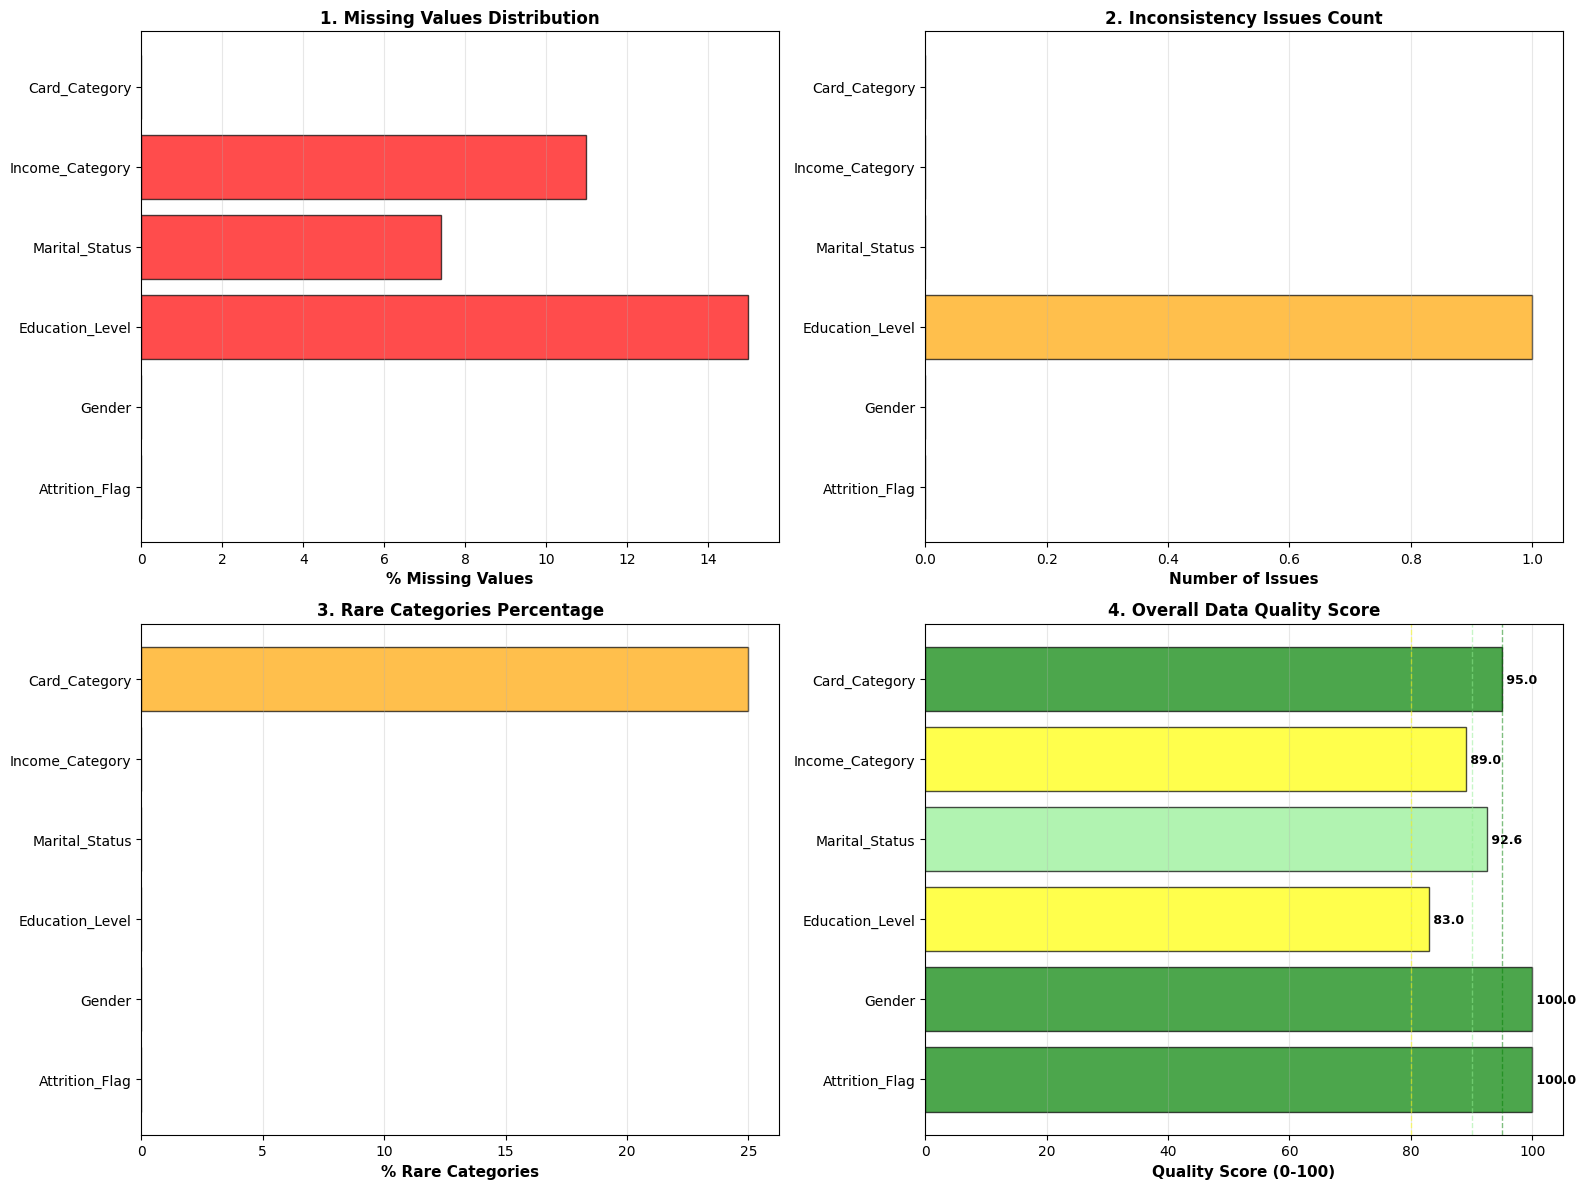

In [83]:
# VẼ BIỂU ĐỒ DATA QUALITY CHO CATEGORICAL COLUMNS
print("\nVẼ BIỂU ĐỒ DATA QUALITY CHO CATEGORICAL COLUMNS")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Biểu đồ 1: Missing Values
cols_short = [col[:20] + '..' if len(col) > 20 else col for col in categorical_cols]
missing_pcts = [categorical_missing[col]['missing_pct'] for col in categorical_cols]
colors_missing = ['green' if pct == 0 else 'orange' if pct < 5 else 'red' for pct in missing_pcts]

ax1.barh(cols_short, missing_pcts, color=colors_missing, alpha=0.7, edgecolor='black')
ax1.set_xlabel('% Missing Values', fontsize=11, fontweight='bold')
ax1.set_title('1. Missing Values Distribution', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Biểu đồ 2: Inconsistencies Count
inconsistency_counts = []
for col in categorical_cols:
    info = inconsistency_analysis[col]
    total_issues = (len(info['case_variations']) + 
                   len(info['whitespace_issues']) + 
                   len(info['similar_values']))
    inconsistency_counts.append(total_issues)

colors_inconsist = ['green' if c == 0 else 'orange' if c < 3 else 'red' for c in inconsistency_counts]

ax2.barh(cols_short, inconsistency_counts, color=colors_inconsist, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Number of Issues', fontsize=11, fontweight='bold')
ax2.set_title('2. Inconsistency Issues Count', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Biểu đồ 3: Rare Categories %
rare_pcts = [rare_categories_analysis[col]['pct_rare'] for col in categorical_cols]
colors_rare = ['green' if p == 0 else 'yellow' if p < 20 else 'orange' if p < 50 else 'red' for p in rare_pcts]

ax3.barh(cols_short, rare_pcts, color=colors_rare, alpha=0.7, edgecolor='black')
ax3.set_xlabel('% Rare Categories', fontsize=11, fontweight='bold')
ax3.set_title('3. Rare Categories Percentage', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# Biểu đồ 4: Overall Quality Score
quality_scores = []
for i, col in enumerate(categorical_cols):
    # Tính điểm chất lượng (0-100)
    # Trừ điểm cho missing, inconsistencies, và rare categories
    score = 100
    score -= categorical_missing[col]['missing_pct']  # Trừ % missing
    score -= inconsistency_counts[i] * 2  # Mỗi issue trừ 2 điểm
    score -= rare_pcts[i] * 0.2  # % rare categories trừ nhẹ
    score = max(0, score)  # Không âm
    quality_scores.append(score)

colors_quality = ['green' if s >= 95 else 'lightgreen' if s >= 90 else 'yellow' if s >= 80 else 'orange' if s >= 70 else 'red' for s in quality_scores]

ax4.barh(cols_short, quality_scores, color=colors_quality, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Quality Score (0-100)', fontsize=11, fontweight='bold')
ax4.set_title('4. Overall Data Quality Score', fontsize=12, fontweight='bold')
ax4.axvline(95, color='green', linestyle='--', linewidth=1, alpha=0.5)
ax4.axvline(90, color='lightgreen', linestyle='--', linewidth=1, alpha=0.5)
ax4.axvline(80, color='yellow', linestyle='--', linewidth=1, alpha=0.5)
ax4.grid(True, alpha=0.3, axis='x')

# Thêm giá trị
for i, (bar, score) in enumerate(zip(ax4.patches, quality_scores)):
    ax4.text(score, bar.get_y() + bar.get_height()/2.,
             f' {score:.1f}',
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Missing Data Analysis - Overall Assessment (Đánh giá tổng thể Missing Data)

Phân tích toàn diện về missing values trong toàn bộ dataset, bao gồm cả numeric và categorical columns.

In [84]:
# TẠO MISSING VALUES SUMMARY CHO TOÀN BỘ DATASET
print("="*90)
print("MISSING DATA ANALYSIS - OVERALL ASSESSMENT")
print("="*90)

# Tổng hợp thông tin missing cho tất cả các cột
all_columns_missing = {}

# Thêm thông tin từ numeric columns
for col in numeric_cols:
    info = missing_analysis[col]
    all_columns_missing[col] = {
        'type': 'Numeric',
        'missing_count': info['missing_count'],
        'total_count': info['total_count'],
        'missing_pct': info['missing_pct']
    }

# Thêm thông tin từ categorical columns
for col in categorical_cols:
    info = categorical_missing[col]
    all_columns_missing[col] = {
        'type': 'Categorical',
        'missing_count': info['missing_count'],
        'total_count': info['total_count'],
        'missing_pct': info['missing_pct']
    }

# Sắp xếp theo % missing giảm dần
sorted_cols = sorted(all_columns_missing.items(), key=lambda x: x[1]['missing_pct'], reverse=True)

print(f"\nMISSING VALUES SUMMARY - TẤT CẢ CÁC CỘT")
print(f"{'Cột':<35} {'Type':<12} {'Total':>10} {'Missing':>10} {'%':>10}")
print("-"*90)

for col_name, info in sorted_cols:
    col_display = col_name[:33] + '..' if len(col_name) > 33 else col_name
    
    print(f"{col_display:<35} {info['type']:<12} {info['total_count']:>10} "
          f"{info['missing_count']:>10} {info['missing_pct']:>9.2f}%")

# Tính tổng
print("\n" + "="*90)
print("TỔNG KẾT:")
print("="*90)
total_missing = sum(info['missing_count'] for info in all_columns_missing.values())
total_cells = sum(info['total_count'] for info in all_columns_missing.values())
overall_pct = (total_missing / total_cells) * 100 if total_cells > 0 else 0

print(f"Tổng số cells trong dataset: {total_cells:,}")
print(f"Tổng số missing values: {total_missing:,}")
print(f"Tỷ lệ missing tổng thể: {overall_pct:.2f}%")
print()
print(f"Số cột có missing: {sum(1 for info in all_columns_missing.values() if info['missing_count'] > 0)}")
print(f"Số cột hoàn chỉnh: {sum(1 for info in all_columns_missing.values() if info['missing_count'] == 0)}")
print()

# Phân loại theo mức độ missing
no_missing = sum(1 for info in all_columns_missing.values() if info['missing_pct'] == 0)
low_missing = sum(1 for info in all_columns_missing.values() if 0 < info['missing_pct'] < 5)
med_missing = sum(1 for info in all_columns_missing.values() if 5 <= info['missing_pct'] < 15)
high_missing = sum(1 for info in all_columns_missing.values() if info['missing_pct'] >= 15)

print(f"Phân loại theo mức độ missing:")
print(f"  - Hoàn chỉnh (0%): {no_missing} cột")
print(f"  - Ít missing (<5%): {low_missing} cột")
print(f"  - Vừa missing (5-15%): {med_missing} cột")
print(f"  - Nhiều missing (≥15%): {high_missing} cột")
print("="*90)

MISSING DATA ANALYSIS - OVERALL ASSESSMENT

MISSING VALUES SUMMARY - TẤT CẢ CÁC CỘT
Cột                                 Type              Total    Missing          %
------------------------------------------------------------------------------------------
Education_Level                     Categorical       10127       1519     15.00%
Income_Category                     Categorical       10127       1112     10.98%
Marital_Status                      Categorical       10127        749      7.40%
Customer_Age                        Numeric           10127          0      0.00%
Dependent_count                     Numeric           10127          0      0.00%
Months_on_book                      Numeric           10127          0      0.00%
Total_Relationship_Count            Numeric           10127          0      0.00%
Months_Inactive_12_mon              Numeric           10127          0      0.00%
Contacts_Count_12_mon               Numeric           10127          0      0.00%
Credi


VẼ BIỂU ĐỒ MISSING DATA PATTERNS


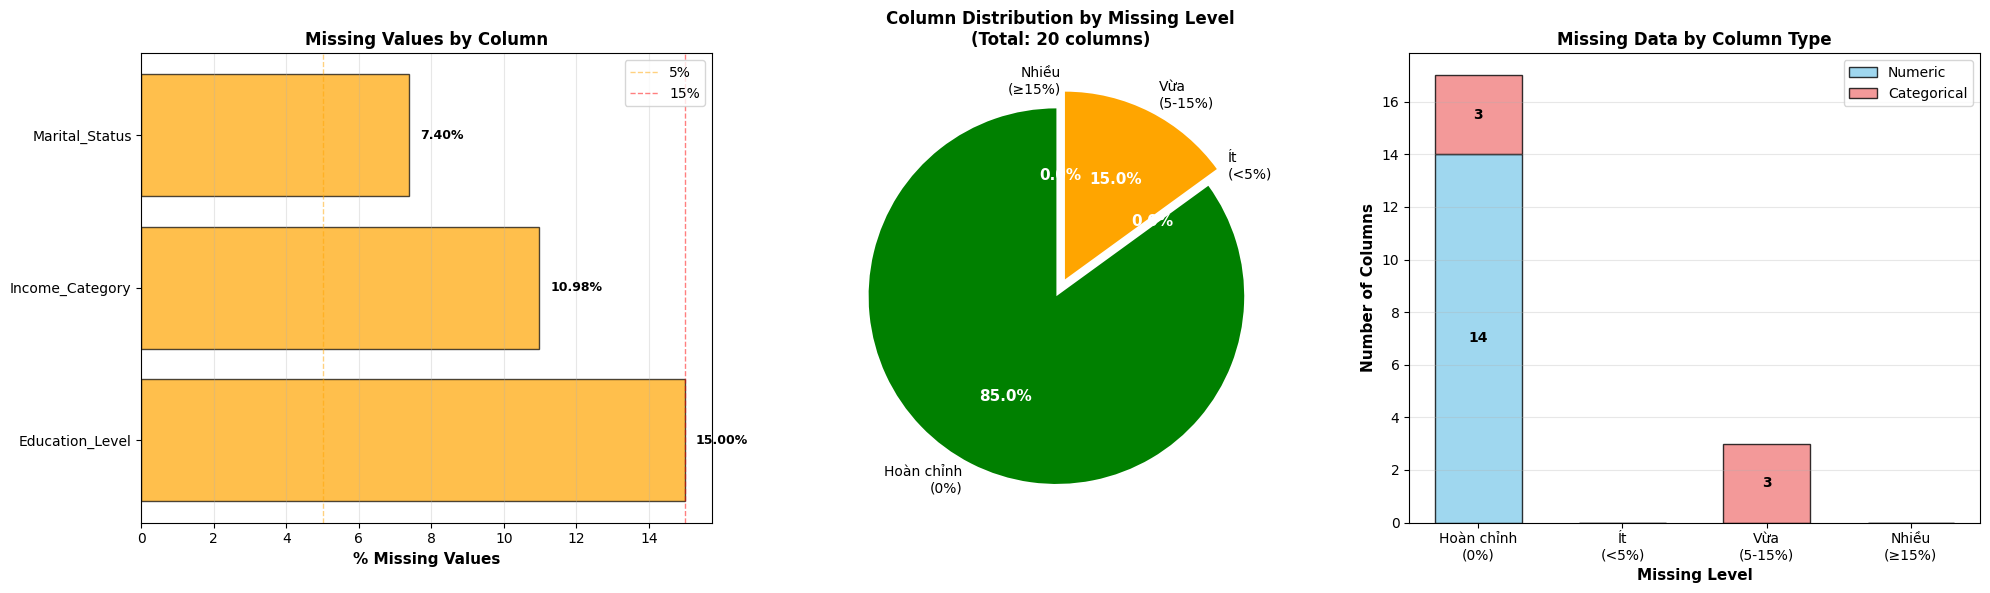

In [85]:
# VẼ BIỂU ĐỒ MISSING DATA PATTERNS
print("\nVẼ BIỂU ĐỒ MISSING DATA PATTERNS")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Biểu đồ 1: Bar Chart - Missing % theo từng cột
cols_with_missing = [(col, info) for col, info in sorted_cols if info['missing_pct'] > 0]

if cols_with_missing:
    cols_names = [col[:20] + '..' if len(col) > 20 else col for col, _ in cols_with_missing]
    missing_pcts = [info['missing_pct'] for _, info in cols_with_missing]
    colors = ['red' if pct >= 15 else 'orange' if pct >= 5 else 'yellow' for pct in missing_pcts]
    
    ax1.barh(cols_names, missing_pcts, color=colors, alpha=0.7, edgecolor='black')
    ax1.set_xlabel('% Missing Values', fontsize=11, fontweight='bold')
    ax1.set_title('Missing Values by Column', fontsize=12, fontweight='bold')
    ax1.axvline(5, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='5%')
    ax1.axvline(15, color='red', linestyle='--', linewidth=1, alpha=0.5, label='15%')
    ax1.grid(True, alpha=0.3, axis='x')
    ax1.legend()
    
    # Thêm giá trị
    for i, (bar, pct) in enumerate(zip(ax1.patches, missing_pcts)):
        ax1.text(pct + 0.3, bar.get_y() + bar.get_height()/2.,
                 f'{pct:.2f}%',
                 ha='left', va='center', fontsize=9, fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'Không có missing values\ntrong dataset', 
             ha='center', va='center', fontsize=14, fontweight='bold',
             transform=ax1.transAxes)
    ax1.set_title('Missing Values by Column', fontsize=12, fontweight='bold')

# Biểu đồ 2: Pie Chart - Phân bố theo mức độ missing
categories = ['Hoàn chỉnh\n(0%)', 'Ít\n(<5%)', 'Vừa\n(5-15%)', 'Nhiều\n(≥15%)']
counts = [no_missing, low_missing, med_missing, high_missing]
colors_pie = ['green', 'yellow', 'orange', 'red']
explode = [0.05 if c > 0 else 0 for c in counts]

wedges, texts, autotexts = ax2.pie(counts, labels=categories, autopct='%1.1f%%',
                                     colors=colors_pie, explode=explode,
                                     startangle=90, textprops={'fontsize': 10})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

ax2.set_title(f'Column Distribution by Missing Level\n(Total: {len(all_columns_missing)} columns)', 
              fontsize=12, fontweight='bold')

# Biểu đồ 3: Stacked Bar - Numeric vs Categorical
numeric_counts = [0, 0, 0, 0]  # [complete, low, med, high]
categorical_counts = [0, 0, 0, 0]

for col, info in all_columns_missing.items():
    pct = info['missing_pct']
    idx = 0 if pct == 0 else 1 if pct < 5 else 2 if pct < 15 else 3
    
    if info['type'] == 'Numeric':
        numeric_counts[idx] += 1
    else:
        categorical_counts[idx] += 1

x_labels = ['Hoàn chỉnh\n(0%)', 'Ít\n(<5%)', 'Vừa\n(5-15%)', 'Nhiều\n(≥15%)']
x_pos = np.arange(len(x_labels))
width = 0.6

bars1 = ax3.bar(x_pos, numeric_counts, width, label='Numeric', color='skyblue', alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x_pos, categorical_counts, width, bottom=numeric_counts, 
                label='Categorical', color='lightcoral', alpha=0.8, edgecolor='black')

ax3.set_xlabel('Missing Level', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Columns', fontsize=11, fontweight='bold')
ax3.set_title('Missing Data by Column Type', fontsize=12, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(x_labels)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Thêm giá trị
for i, (b1, b2) in enumerate(zip(bars1, bars2)):
    if numeric_counts[i] > 0:
        ax3.text(b1.get_x() + b1.get_width()/2., numeric_counts[i]/2,
                 str(numeric_counts[i]),
                 ha='center', va='center', fontsize=10, fontweight='bold')
    if categorical_counts[i] > 0:
        ax3.text(b2.get_x() + b2.get_width()/2., numeric_counts[i] + categorical_counts[i]/2,
                 str(categorical_counts[i]),
                 ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [86]:
# PHÂN TÍCH PATTERN CỦA MISSING VALUES - TÌM KIẾM QUY LUẬT
print("\n" + "="*60)
print("PHÂN TÍCH PATTERN & QUY LUẬT CỦA MISSING VALUES")
print("="*60)

# Tạo ma trận missing (1 = missing, 0 = có giá trị)
# Chỉ phân tích các cột có missing
cols_with_missing_data = [col for col, info in all_columns_missing.items() if info['missing_count'] > 0]

if len(cols_with_missing_data) > 0:
    print(f"\nPhân tích {len(cols_with_missing_data)} cột có missing values:")
    for col in cols_with_missing_data:
        info = all_columns_missing[col]
        print(f" - {col}: {info['missing_count']} missing ({info['missing_pct']:.2f}%)")
    
    # Tạo ma trận missing cho từng dòng
    print(f"\n{'='*60}")
    print("PHÂN TÍCH MISSING THEO TỪNG DÒNG (ROWS)")
    print(f"{'='*60}")
    
    # Đếm số missing values trong mỗi dòng
    row_missing_counts = []
    
    for row_idx in range(n_rows):
        missing_in_row = 0
        
        for col in cols_with_missing_data:
            col_idx = column_names.index(col)
            val = raw_data[row_idx, col_idx]
            
            # Kiểm tra missing
            is_missing = False
            if all_columns_missing[col]['type'] == 'Categorical':
                # Categorical: kiểm tra 'Unknown'
                is_missing = (val == 'Unknown' or val == '' or val is None or 
                             str(val).strip() == '' or str(val).upper() in ['NA', 'N/A', 'NAN', 'NULL', 'NONE'])
            else:
                # Numeric: kiểm tra empty
                is_missing = (val == '' or val is None or str(val).strip() == '')
            
            if is_missing:
                missing_in_row += 1
        
        row_missing_counts.append(missing_in_row)
    
    row_missing_counts = np.array(row_missing_counts)
    
    # Thống kê
    unique_counts, count_freq = np.unique(row_missing_counts, return_counts=True)
    
    print(f"\nPhân bố số missing values trên mỗi dòng:")
    print(f"{'Số missing/dòng':<20} {'Số dòng':>15} {'Tỷ lệ (%)':>15}")
    print("-"*60)
    
    for count, freq in zip(unique_counts, count_freq):
        pct = (freq / n_rows) * 100
        print(f"{count:<20} {freq:>15,} {pct:>14.2f}%")
    
    print(f"\n{'='*60}")
    print("THỐNG KÊ:")
    print(f" - Số dòng không có missing: {sum(row_missing_counts == 0):,} ({(sum(row_missing_counts == 0)/n_rows)*100:.2f}%)")
    print(f"  - Số dòng có ít nhất 1 missing: {sum(row_missing_counts > 0):,} ({(sum(row_missing_counts > 0)/n_rows)*100:.2f}%)")
    print(f"  - Số dòng có 2+ missing: {sum(row_missing_counts >= 2):,} ({(sum(row_missing_counts >= 2)/n_rows)*100:.2f}%)")
    print(f"  - Số dòng có tất cả cột missing: {sum(row_missing_counts == len(cols_with_missing_data)):,}")
    print(f"  - Số missing trung bình/dòng: {np.mean(row_missing_counts):.2f}")
    print(f"  - Số missing tối đa trong 1 dòng: {np.max(row_missing_counts)}")
    
else:
    print("\n✅ KHÔNG CÓ MISSING VALUES trong dataset!")


PHÂN TÍCH PATTERN & QUY LUẬT CỦA MISSING VALUES

Phân tích 3 cột có missing values:
 - Education_Level: 1519 missing (15.00%)
 - Marital_Status: 749 missing (7.40%)
 - Income_Category: 1112 missing (10.98%)

PHÂN TÍCH MISSING THEO TỪNG DÒNG (ROWS)



Phân bố số missing values trên mỗi dòng:
Số missing/dòng              Số dòng       Tỷ lệ (%)
------------------------------------------------------------
0                              7,081          69.92%
1                              2,719          26.85%
2                                320           3.16%
3                                  7           0.07%

THỐNG KÊ:
 - Số dòng không có missing: 7,081 (69.92%)
  - Số dòng có ít nhất 1 missing: 3,046 (30.08%)
  - Số dòng có 2+ missing: 327 (3.23%)
  - Số dòng có tất cả cột missing: 7
  - Số missing trung bình/dòng: 0.33
  - Số missing tối đa trong 1 dòng: 3


In [87]:
# PHÂN TÍCH CORRELATION GIỮA CÁC CỘT MISSING
print("\n" + "="*80)
print("PHÂN TÍCH CORRELATION GIỮA MISSING VALUES CỦA CÁC CỘT")
print("="*80)
print("Kiểm tra xem missing values ở các cột có xuất hiện cùng nhau hay không")

if len(cols_with_missing_data) >= 2:
    # Tạo ma trận binary cho missing (1 = missing, 0 = có giá trị)
    missing_matrix = np.zeros((n_rows, len(cols_with_missing_data)), dtype=int)
    
    for col_num, col in enumerate(cols_with_missing_data):
        col_idx = column_names.index(col)
        
        for row_idx in range(n_rows):
            val = raw_data[row_idx, col_idx]
            
            # Kiểm tra missing
            is_missing = False
            if all_columns_missing[col]['type'] == 'Categorical':
                is_missing = (val == 'Unknown' or val == '' or val is None or 
                             str(val).strip() == '' or str(val).upper() in ['NA', 'N/A', 'NAN', 'NULL', 'NONE'])
            else:
                is_missing = (val == '' or val is None or str(val).strip() == '')
            
            missing_matrix[row_idx, col_num] = 1 if is_missing else 0
    
    # Tính correlation giữa các cột missing
    from scipy.stats import pearsonr
    
    print(f"\nCorrelation Matrix (Pearson) - Missing Values:")
    print(f"Giá trị gần 1 = missing values có xu hướng xuất hiện cùng nhau")
    print(f"Giá trị gần 0 = missing values độc lập với nhau")
    print()
    
    # Tạo correlation matrix
    n_cols_missing = len(cols_with_missing_data)
    corr_matrix = np.zeros((n_cols_missing, n_cols_missing))
    
    for i in range(n_cols_missing):
        for j in range(n_cols_missing):
            if i == j:
                corr_matrix[i, j] = 1.0
            else:
                # Tính correlation
                corr, _ = pearsonr(missing_matrix[:, i], missing_matrix[:, j])
                corr_matrix[i, j] = corr
    
    # Hiển thị correlation matrix
    col_names_short = [col[:20] + '..' if len(col) > 20 else col for col in cols_with_missing_data]
    
    for i, col_i in enumerate(col_names_short):
        print(f"{col_i:<25}", end='')
        for j in range(n_cols_missing):
            if i == j:
                print(f" {'1.00':>12}", end='')
            else:
                print(f" {corr_matrix[i, j]:>12.3f}", end='')
        print()
    
    # Tìm các cặp có correlation cao
    print(f"\n{'='*80}")
    print("CÁC CẶP CỘT CÓ CORRELATION CAO (|r| > 0.1):")
    print(f"{'='*100}")
    
    high_corr_found = False
    for i in range(n_cols_missing):
        for j in range(i+1, n_cols_missing):
            corr_val = corr_matrix[i, j]
            if abs(corr_val) > 0.1:
                high_corr_found = True
                print(f"\n{cols_with_missing_data[i]} <-> {cols_with_missing_data[j]}")
                print(f"  Correlation: {corr_val:.3f}")
                
                # Đếm số dòng có cả 2 cột đều missing
                both_missing = np.sum((missing_matrix[:, i] == 1) & (missing_matrix[:, j] == 1))
                print(f"  Số dòng có cả 2 cột missing: {both_missing} ({(both_missing/n_rows)*100:.2f}%)")
    
    if not high_corr_found:
        print("\nKHÔNG CÓ cặp cột nào có correlation cao")
        print("Missing values xuất hiện độc lập, KHÔNG có pattern rõ ràng")

elif len(cols_with_missing_data) == 1:
    print(f"\nChỉ có 1 cột có missing ({cols_with_missing_data[0]}), không thể tính correlation")
else:
    print("\nKhông có cột nào có missing values")


PHÂN TÍCH CORRELATION GIỮA MISSING VALUES CỦA CÁC CỘT
Kiểm tra xem missing values ở các cột có xuất hiện cùng nhau hay không

Correlation Matrix (Pearson) - Missing Values:
Giá trị gần 1 = missing values có xu hướng xuất hiện cùng nhau
Giá trị gần 0 = missing values độc lập với nhau

Education_Level                   1.00        0.002       -0.019
Marital_Status                   0.002         1.00       -0.000
Income_Category                 -0.019       -0.000         1.00

CÁC CẶP CỘT CÓ CORRELATION CAO (|r| > 0.1):

KHÔNG CÓ cặp cột nào có correlation cao
Missing values xuất hiện độc lập, KHÔNG có pattern rõ ràng


HEATMAP - MISSING DATA PATTERN


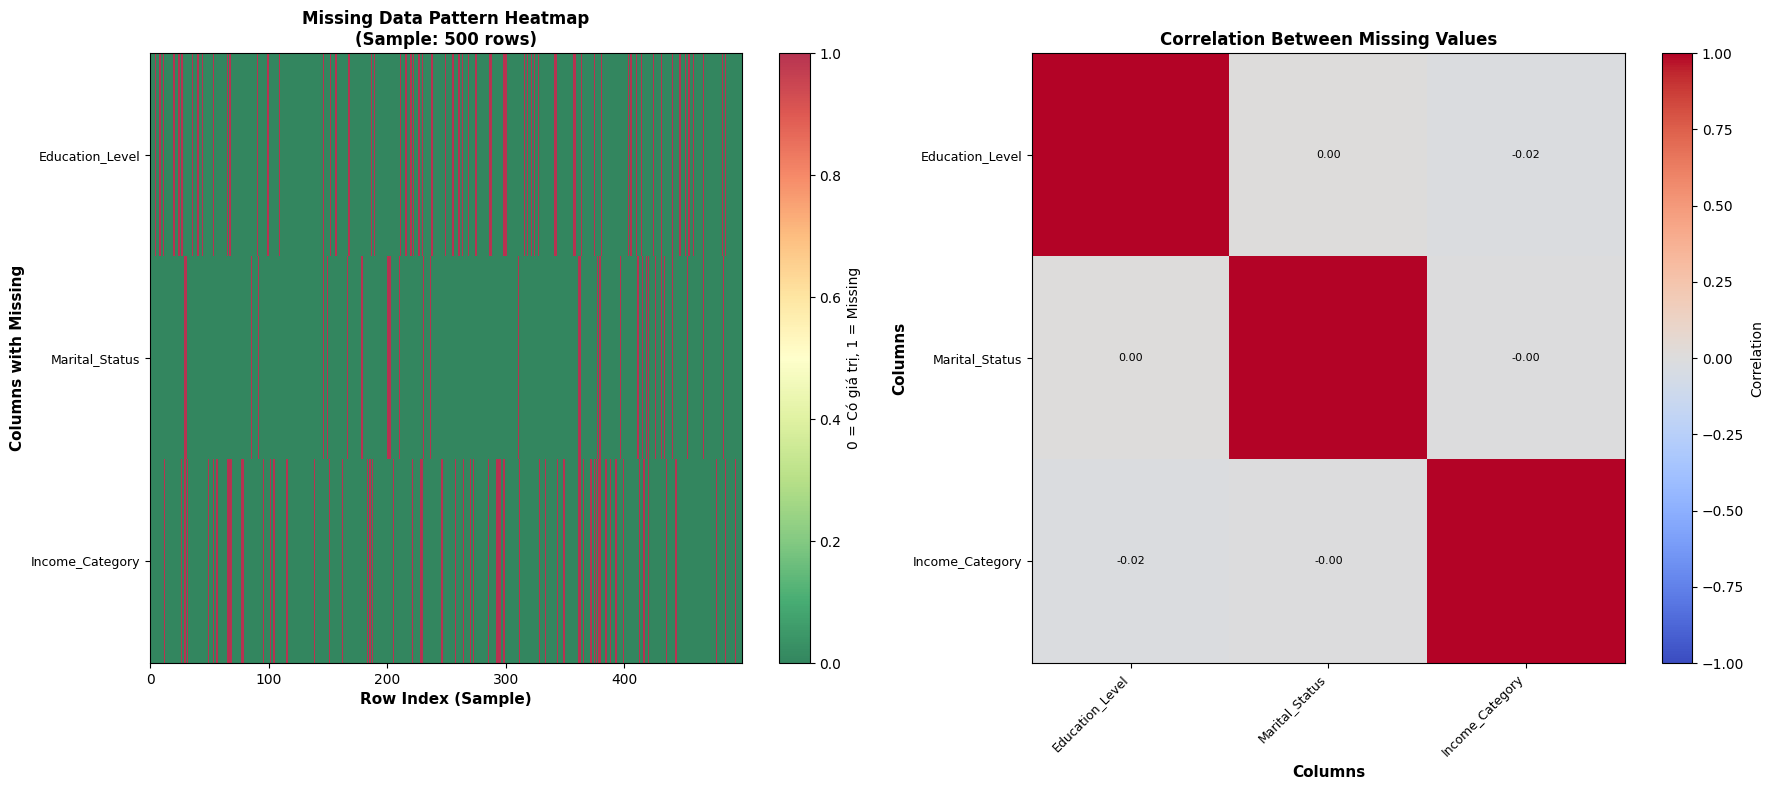

In [88]:
# VẼ HEATMAP - MISSING DATA PATTERN
print("HEATMAP - MISSING DATA PATTERN")

if len(cols_with_missing_data) > 0:
    # Lấy sample để vẽ (vẽ tất cả có thể quá lớn)
    sample_size = min(500, n_rows)
    sample_indices = np.random.choice(n_rows, sample_size, replace=False)
    sample_indices = np.sort(sample_indices)
    
    # Tạo ma trận missing cho sample
    missing_matrix_sample = missing_matrix[sample_indices, :]
    
    # Vẽ heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Heatmap 1: Missing pattern across rows
    im1 = ax1.imshow(missing_matrix_sample.T, aspect='auto', cmap='RdYlGn_r', 
                     interpolation='nearest', alpha=0.8)
    
    ax1.set_xlabel('Row Index (Sample)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Columns with Missing', fontsize=11, fontweight='bold')
    ax1.set_title(f'Missing Data Pattern Heatmap\n(Sample: {sample_size} rows)', 
                  fontsize=12, fontweight='bold')
    
    # Set y-ticks
    ax1.set_yticks(range(len(cols_with_missing_data)))
    ax1.set_yticklabels([col[:25] + '..' if len(col) > 25 else col for col in cols_with_missing_data], 
                        fontsize=9)
    
    # Colorbar
    cbar1 = plt.colorbar(im1, ax=ax1)
    cbar1.set_label('0 = Có giá trị, 1 = Missing', fontsize=10)
    
    # Heatmap 2: Correlation heatmap
    if len(cols_with_missing_data) >= 2:
        im2 = ax2.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
        
        ax2.set_xlabel('Columns', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Columns', fontsize=11, fontweight='bold')
        ax2.set_title('Correlation Between Missing Values', fontsize=12, fontweight='bold')
        
        # Set ticks
        ax2.set_xticks(range(len(cols_with_missing_data)))
        ax2.set_yticks(range(len(cols_with_missing_data)))
        ax2.set_xticklabels([col[:15] + '..' if len(col) > 15 else col for col in cols_with_missing_data], 
                           rotation=45, ha='right', fontsize=9)
        ax2.set_yticklabels([col[:15] + '..' if len(col) > 15 else col for col in cols_with_missing_data], 
                           fontsize=9)
        
        # Thêm giá trị correlation
        for i in range(len(cols_with_missing_data)):
            for j in range(len(cols_with_missing_data)):
                if i != j:
                    text = ax2.text(j, i, f'{corr_matrix[i, j]:.2f}',
                                   ha="center", va="center", color="black", fontsize=8)
        
        # Colorbar
        cbar2 = plt.colorbar(im2, ax=ax2)
        cbar2.set_label('Correlation', fontsize=10)
    else:
        ax2.text(0.5, 0.5, 'Cần ít nhất 2 cột\nđể tính correlation', 
                ha='center', va='center', fontsize=12, transform=ax2.transAxes)
        ax2.set_title('Correlation Between Missing Values', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [89]:
# KẾT LUẬN VỀ MISSING DATA PATTERN
print("KẾT LUẬN: ARE MISSING VALUES RANDOM OR IS THERE A PATTERN?")

if len(cols_with_missing_data) > 0:
    # Phân tích tính random của missing values
    
    # 1. Kiểm tra distribution across rows
    rows_with_all_missing = sum(row_missing_counts == len(cols_with_missing_data))
    rows_with_no_missing = sum(row_missing_counts == 0)
    rows_with_partial_missing = sum((row_missing_counts > 0) & (row_missing_counts < len(cols_with_missing_data)))
    
    print("\nPHÂN BỐ MISSING THEO DÒNG:")
    print(f"  - {rows_with_no_missing:,} dòng ({(rows_with_no_missing/n_rows)*100:.2f}%) - KHÔNG có missing")
    print(f"  - {rows_with_partial_missing:,} dòng ({(rows_with_partial_missing/n_rows)*100:.2f}%) - CÓ 1 số missing")
    print(f"  - {rows_with_all_missing:,} dòng ({(rows_with_all_missing/n_rows)*100:.2f}%) - TẤT CẢ đều missing")
    
    # 2. Kiểm tra correlation
    if len(cols_with_missing_data) >= 2:
        max_corr = 0
        for i in range(len(cols_with_missing_data)):
            for j in range(i+1, len(cols_with_missing_data)):
                if abs(corr_matrix[i, j]) > abs(max_corr):
                    max_corr = corr_matrix[i, j]
        
        print(f"\n CORRELATION GIỮA CÁC CỘT MISSING:")
        print(f" - Correlation cao nhất: {max_corr:.3f}")
        
        if abs(max_corr) < 0.1:
            print(f" - Kết luận: Missing values giữa các cột GẦN NHƯ ĐỘC LẬP")
        elif abs(max_corr) < 0.3:
            print(f" - Kết luận: Missing values có CORRELATION YẾU")
        else:
            print(f" - Kết luận: Missing values có CORRELATION ĐÁNG KỂ")
    
    # 3. Phân tích theo nhóm (nếu có target variable)
    if 'Attrition_Flag' in column_names:
        print(f"\nPHÂN TÍCH MISSING THEO NHÓM KHÁCH HÀNG:")
        
        target_idx = column_names.index('Attrition_Flag')
        target_data = raw_data[:, target_idx]
        unique_targets = np.unique(target_data)
        
        for target_val in unique_targets:
            target_mask = (target_data == target_val)
            target_rows = np.sum(target_mask)
            
            # Tính missing trong nhóm này
            target_missing_counts = row_missing_counts[target_mask]
            target_has_missing = np.sum(target_missing_counts > 0)
            target_missing_pct = (target_has_missing / target_rows) * 100 if target_rows > 0 else 0
            
            print(f"\n   Nhóm: {target_val}")
            print(f"  - Tổng số dòng: {target_rows:,}")
            print(f"  - Dòng có missing: {target_has_missing:,} ({target_missing_pct:.2f}%)")
            print(f"  - Số missing trung bình/dòng: {np.mean(target_missing_counts):.2f}")
    
    # Dựa vào các yếu tố để đưa ra kết luận
    is_random = True
    reasons = []
    
    # Kiểm tra 1: Nếu có correlation cao giữa các cột
    if len(cols_with_missing_data) >= 2 and abs(max_corr) > 0.3:
        is_random = False
        reasons.append(f"• Missing values giữa các cột có correlation cao ({max_corr:.3f})")
    
    # Kiểm tra 2: Nếu có dòng có tất cả missing
    if rows_with_all_missing > 0:
        is_random = False
        reasons.append(f"• Có {rows_with_all_missing} dòng với TẤT CẢ các cột đều missing")
    
    # Kiểm tra 3: Nếu missing tập trung ở nhóm cụ thể
    if 'Attrition_Flag' in column_names:
        target_idx = column_names.index('Attrition_Flag')
        target_data = raw_data[:, target_idx]
        unique_targets = np.unique(target_data)
        
        group_missing_pcts = []
        for target_val in unique_targets:
            target_mask = (target_data == target_val)
            target_rows = np.sum(target_mask)
            target_missing_counts = row_missing_counts[target_mask]
            target_has_missing = np.sum(target_missing_counts > 0)
            pct = (target_has_missing / target_rows) * 100 if target_rows > 0 else 0
            group_missing_pcts.append(pct)
        
        if len(group_missing_pcts) > 1:
            diff = max(group_missing_pcts) - min(group_missing_pcts)
            if diff > 10:  # Chênh lệch > 10%
                is_random = False
                reasons.append(f"• Missing values phân bố KHÔNG ĐỀU giữa các nhóm (chênh lệch {diff:.1f}%)")
    
    if is_random:
        print("\nMISSING VALUES CÓ VẺ XUẤT HIỆN NGẪU NHIÊN (RANDOM)")
    else:
        print("\nMISSING VALUES CÓ VẺ KHÔNG NGẪU NHIÊN - CÓ PATTERN")

else:
    print("\nDataset KHÔNG CÓ missing values!")
    print("  - Dữ liệu hoàn chỉnh, sẵn sàng cho phân tích")

KẾT LUẬN: ARE MISSING VALUES RANDOM OR IS THERE A PATTERN?

PHÂN BỐ MISSING THEO DÒNG:
  - 7,081 dòng (69.92%) - KHÔNG có missing
  - 3,039 dòng (30.01%) - CÓ 1 số missing
  - 7 dòng (0.07%) - TẤT CẢ đều missing

 CORRELATION GIỮA CÁC CỘT MISSING:
 - Correlation cao nhất: -0.019
 - Kết luận: Missing values giữa các cột GẦN NHƯ ĐỘC LẬP

PHÂN TÍCH MISSING THEO NHÓM KHÁCH HÀNG:

   Nhóm: Attrited Customer
  - Tổng số dòng: 1,627
  - Dòng có missing: 514 (31.59%)
  - Số missing trung bình/dòng: 0.35

   Nhóm: Existing Customer
  - Tổng số dòng: 8,500
  - Dòng có missing: 2,532 (29.79%)
  - Số missing trung bình/dòng: 0.33

MISSING VALUES CÓ VẺ KHÔNG NGẪU NHIÊN - CÓ PATTERN


## 7. Mối quan hệ & Tương quan (Relationships & Correlations)

Phân tích tương quan giữa các biến số để tìm ra patterns và relationships.

In [90]:
# TÍNH CORRELATION MATRIX CHO CÁC BIẾN SỐ
print("="*80)
print("CORRELATION MATRIX - MA TRẬN TƯƠNG QUAN")
print("="*80)

# Lấy dữ liệu số từ numeric_data dictionary
print("\nChuẩn bị dữ liệu...")

# Tạo danh sách tên cột numeric (bỏ qua CLIENTNUM vì là ID)
numeric_col_names = [col for col in numeric_cols if col != 'CLIENTNUM']
print(f" - Số biến số (không tính CLIENTNUM): {len(numeric_col_names)}")

# Tạo ma trận dữ liệu số từ dictionary
# Tìm số lượng rows chung (dùng cột đầu tiên)
n_rows = len(numeric_data[numeric_col_names[0]])
n_numeric = len(numeric_col_names)

# Tạo ma trận dữ liệu (rows × columns)
numeric_matrix = np.zeros((n_rows, n_numeric))
for i, col in enumerate(numeric_col_names):
    numeric_matrix[:, i] = numeric_data[col]

print(f" - Shape của ma trận: {numeric_matrix.shape}")

# Tạo correlation matrix
correlation_matrix = np.zeros((n_numeric, n_numeric))
# Tính correlation cho từng cặp biến
for i in range(n_numeric):
    for j in range(n_numeric):
        if i == j:
            correlation_matrix[i, j] = 1.0
        elif j < i:
            # Lấy giá trị đã tính từ phía trên đường chéo
            correlation_matrix[i, j] = correlation_matrix[j, i]
        else:
            # Lấy dữ liệu của 2 cột
            col_i_data = numeric_matrix[:, i]
            col_j_data = numeric_matrix[:, j]
            
            # Tính Pearson correlation coefficient
            # r = Σ[(x - x̄)(y - ȳ)] / sqrt(Σ(x - x̄)² * Σ(y - ȳ)²)
            mean_i = np.mean(col_i_data)
            mean_j = np.mean(col_j_data)
            
            numerator = np.sum((col_i_data - mean_i) * (col_j_data - mean_j))
            denominator = np.sqrt(np.sum((col_i_data - mean_i)**2) * np.sum((col_j_data - mean_j)**2))
            
            if denominator > 0:
                correlation_matrix[i, j] = numerator / denominator
            else:
                correlation_matrix[i, j] = 0.0


# Phân tích thống kê về correlation
print("\nPHÂN TÍCH THỐNG KÊ:")

# Lấy các giá trị correlation (không tính đường chéo)
corr_values = []
for i in range(n_numeric):
    for j in range(i+1, n_numeric):
        corr_values.append(correlation_matrix[i, j])

corr_values = np.array(corr_values)

print(f"\n   Tổng số cặp biến: {len(corr_values)}")
print(f"   Correlation trung bình: {np.mean(corr_values):.4f}")
print(f"   Correlation median: {np.median(corr_values):.4f}")
print(f"   Correlation min: {np.min(corr_values):.4f}")
print(f"   Correlation max: {np.max(corr_values):.4f}")
print(f"   Độ lệch chuẩn: {np.std(corr_values):.4f}")

# Phân loại mức độ correlation
very_strong_pos = np.sum(corr_values >= 0.8)
strong_pos = np.sum((corr_values >= 0.6) & (corr_values < 0.8))
moderate_pos = np.sum((corr_values >= 0.4) & (corr_values < 0.6))
weak_pos = np.sum((corr_values >= 0.2) & (corr_values < 0.4))
very_weak = np.sum((corr_values >= -0.2) & (corr_values < 0.2))
weak_neg = np.sum((corr_values >= -0.4) & (corr_values < -0.2))
moderate_neg = np.sum((corr_values >= -0.6) & (corr_values < -0.4))
strong_neg = np.sum((corr_values >= -0.8) & (corr_values < -0.6))
very_strong_neg = np.sum(corr_values < -0.8)

print(f"\nPHÂN LOẠI THEO MỨC ĐỘ TƯƠNG QUAN:")
print(f"  - Rất mạnh dương (≥ 0.8): {very_strong_pos} cặp ({very_strong_pos/len(corr_values)*100:.1f}%)")
print(f"  - Mạnh dương (0.6 - 0.8): {strong_pos} cặp ({strong_pos/len(corr_values)*100:.1f}%)")
print(f"  - Trung bình dương (0.4 - 0.6): {moderate_pos} cặp ({moderate_pos/len(corr_values)*100:.1f}%)")
print(f"  - Yếu dương (0.2 - 0.4): {weak_pos} cặp ({weak_pos/len(corr_values)*100:.1f}%)")
print(f"  - Rất yếu (-0.2 - 0.2): {very_weak} cặp ({very_weak/len(corr_values)*100:.1f}%)")
print(f"  - Yếu âm (-0.4 - -0.2): {weak_neg} cặp ({weak_neg/len(corr_values)*100:.1f}%)")
print(f"  - Trung bình âm (-0.6 - -0.4): {moderate_neg} cặp ({moderate_neg/len(corr_values)*100:.1f}%)")
print(f"  - Mạnh âm (-0.8 - -0.6): {strong_neg} cặp ({strong_neg/len(corr_values)*100:.1f}%)")
print(f"  - Rất mạnh âm (< -0.8): {very_strong_neg} cặp ({very_strong_neg/len(corr_values)*100:.1f}%)")

print("\n" + "="*80)

CORRELATION MATRIX - MA TRẬN TƯƠNG QUAN

Chuẩn bị dữ liệu...
 - Số biến số (không tính CLIENTNUM): 14
 - Shape của ma trận: (10127, 14)

PHÂN TÍCH THỐNG KÊ:

   Tổng số cặp biến: 91
   Correlation trung bình: 0.0226
   Correlation median: -0.0020
   Correlation min: -0.5388
   Correlation max: 0.9960
   Độ lệch chuẩn: 0.2027

PHÂN LOẠI THEO MỨC ĐỘ TƯƠNG QUAN:
  - Rất mạnh dương (≥ 0.8): 2 cặp (2.2%)
  - Mạnh dương (0.6 - 0.8): 2 cặp (2.2%)
  - Trung bình dương (0.4 - 0.6): 0 cặp (0.0%)
  - Yếu dương (0.2 - 0.4): 1 cặp (1.1%)
  - Rất yếu (-0.2 - 0.2): 82 cặp (90.1%)
  - Yếu âm (-0.4 - -0.2): 2 cặp (2.2%)
  - Trung bình âm (-0.6 - -0.4): 2 cặp (2.2%)
  - Mạnh âm (-0.8 - -0.6): 0 cặp (0.0%)
  - Rất mạnh âm (< -0.8): 0 cặp (0.0%)



CORRELATION HEATMAP - BIỂU ĐỒ NHIỆT TƯƠNG QUAN


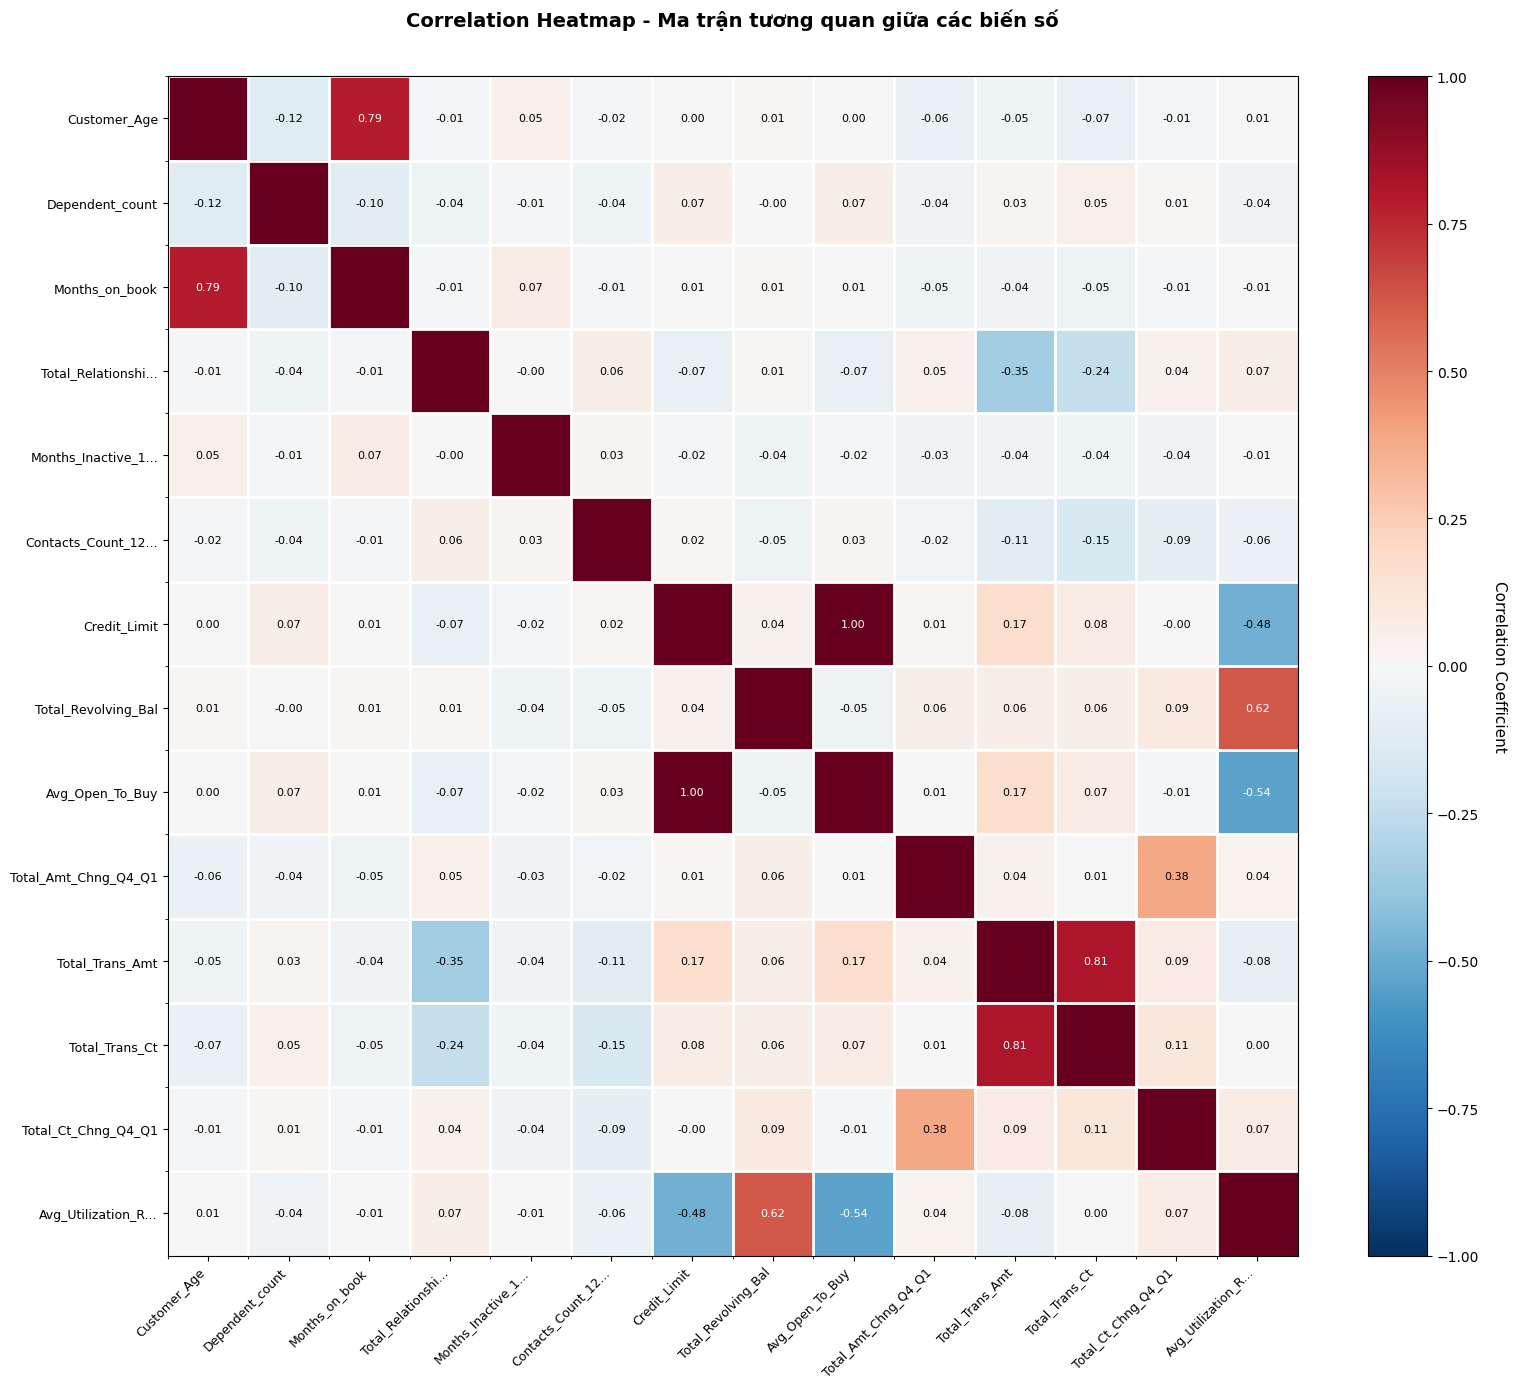

In [91]:
# TẠO CORRELATION HEATMAP
print("="*80)
print("CORRELATION HEATMAP - BIỂU ĐỒ NHIỆT TƯƠNG QUAN")
print("="*80)

# Tạo figure lớn để hiển thị rõ ràng
fig, ax = plt.subplots(figsize=(16, 14))

# Vẽ heatmap
im = ax.imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

# Thiết lập ticks và labels
ax.set_xticks(np.arange(n_numeric))
ax.set_yticks(np.arange(n_numeric))

# Rút ngắn tên cột để dễ đọc
col_names_short = []
for name in numeric_col_names:
    if len(name) > 20:
        col_names_short.append(name[:17] + '...')
    else:
        col_names_short.append(name)

ax.set_xticklabels(col_names_short, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(col_names_short, fontsize=9)

# Thêm text hiển thị giá trị correlation với spacing tốt hơn
for i in range(n_numeric):
    for j in range(n_numeric):
        corr_val = correlation_matrix[i, j]
        # Chỉ hiển thị giá trị nếu không phải đường chéo
        if i != j:
            # Chọn màu text dựa vào nền
            text_color = 'white' if abs(corr_val) > 0.5 else 'black'
            text = ax.text(j, i, f'{corr_val:.2f}',
                          ha="center", va="center", color=text_color, fontsize=8)

# Thêm gridlines để tạo khoảng cách rõ ràng giữa các ô
ax.set_xticks(np.arange(n_numeric) - 0.5, minor=True)
ax.set_yticks(np.arange(n_numeric) - 0.5, minor=True)
ax.grid(which='minor', color='white', linestyle='-', linewidth=2)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20, fontsize=11)

# Tiêu đề
ax.set_title('Correlation Heatmap - Ma trận tương quan giữa các biến số\n', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


In [92]:
# XÁC ĐỊNH CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH
print("="*80)
print("CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH")
print("="*80)

# Ngưỡng để xác định tương quan mạnh
STRONG_CORR_THRESHOLD = 0.5

print(f"Ngưỡng tương quan mạnh: |r| ≥ {STRONG_CORR_THRESHOLD}")
print("="*80)


# Tìm các cặp có correlation mạnh (positive hoặc negative)
strong_correlations = []

for i in range(n_numeric):
    for j in range(i+1, n_numeric):  # Chỉ lấy nửa trên của ma trận
        corr_val = correlation_matrix[i, j]
        if abs(corr_val) >= STRONG_CORR_THRESHOLD:
            strong_correlations.append({
                'var1': numeric_col_names[i],
                'var2': numeric_col_names[j],
                'correlation': corr_val,
                'abs_correlation': abs(corr_val),
                'type': 'Positive' if corr_val > 0 else 'Negative'
            })

# Sắp xếp theo giá trị tuyệt đối của correlation (giảm dần)
strong_correlations.sort(key=lambda x: x['abs_correlation'], reverse=True)

print(f"Tìm thấy {len(strong_correlations)} cặp biến có tương quan mạnh:")

if len(strong_correlations) > 0:
    print(f"\n{'#':<3} {'Biến 1':<25} {'Biến 2':<25} {'Correlation':>12} {'Loại':>10}")
    print("-"*80)
    
    for idx, item in enumerate(strong_correlations, 1):
        var1_display = item['var1'][:24] if len(item['var1']) > 24 else item['var1']
        var2_display = item['var2'][:24] if len(item['var2']) > 24 else item['var2']
        print(f"{idx:<3} {var1_display:<25} {var2_display:<25} {item['correlation']:>12.4f} {item['type']:>10}")
else:
    print("\nKhông tìm thấy cặp biến nào có tương quan mạnh (|r| ≥ 0.5)")

# Phân loại theo mức độ
print("\n" + "="*80)
print("PHÂN LOẠI THEO MỨC ĐỘ TƯƠNG QUAN")
print("="*80)

very_strong = [x for x in strong_correlations if x['abs_correlation'] >= 0.9]
strong = [x for x in strong_correlations if 0.7 <= x['abs_correlation'] < 0.9]
moderate = [x for x in strong_correlations if 0.5 <= x['abs_correlation'] < 0.7]

print(f"\nRẤT MẠNH (|r| ≥ 0.9): {len(very_strong)} cặp")
if len(very_strong) > 0:
    for item in very_strong:
        print(f"  - {item['var1']} ↔ {item['var2']}: {item['correlation']:.4f}")

print(f"\nMẠNH (0.7 ≤ |r| < 0.9): {len(strong)} cặp")
if len(strong) > 0:
    for item in strong:
        print(f"  - {item['var1']} ↔ {item['var2']}: {item['correlation']:.4f}")

print(f"\nTRUNG BÌNH (0.5 ≤ |r| < 0.7): {len(moderate)} cặp")
if len(moderate) > 0:
    for item in moderate:
        print(f"  - {item['var1']} ↔ {item['var2']}: {item['correlation']:.4f}")

print("\n" + "="*80)

CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH
Ngưỡng tương quan mạnh: |r| ≥ 0.5
Tìm thấy 5 cặp biến có tương quan mạnh:

#   Biến 1                    Biến 2                     Correlation       Loại
--------------------------------------------------------------------------------
1   Credit_Limit              Avg_Open_To_Buy                 0.9960   Positive
2   Total_Trans_Amt           Total_Trans_Ct                  0.8072   Positive
3   Customer_Age              Months_on_book                  0.7889   Positive
4   Total_Revolving_Bal       Avg_Utilization_Ratio           0.6240   Positive
5   Avg_Open_To_Buy           Avg_Utilization_Ratio          -0.5388   Negative

PHÂN LOẠI THEO MỨC ĐỘ TƯƠNG QUAN

RẤT MẠNH (|r| ≥ 0.9): 1 cặp
  - Credit_Limit ↔ Avg_Open_To_Buy: 0.9960

MẠNH (0.7 ≤ |r| < 0.9): 2 cặp
  - Total_Trans_Amt ↔ Total_Trans_Ct: 0.8072
  - Customer_Age ↔ Months_on_book: 0.7889

TRUNG BÌNH (0.5 ≤ |r| < 0.7): 2 cặp
  - Total_Revolving_Bal ↔ Avg_Utilization_Ratio: 0.6240
  - Avg_Open_To

SCATTER PLOTS - BIỂU ĐỒ PHÂN TÁN CÁC CẶP TƯƠNG QUAN MẠNH


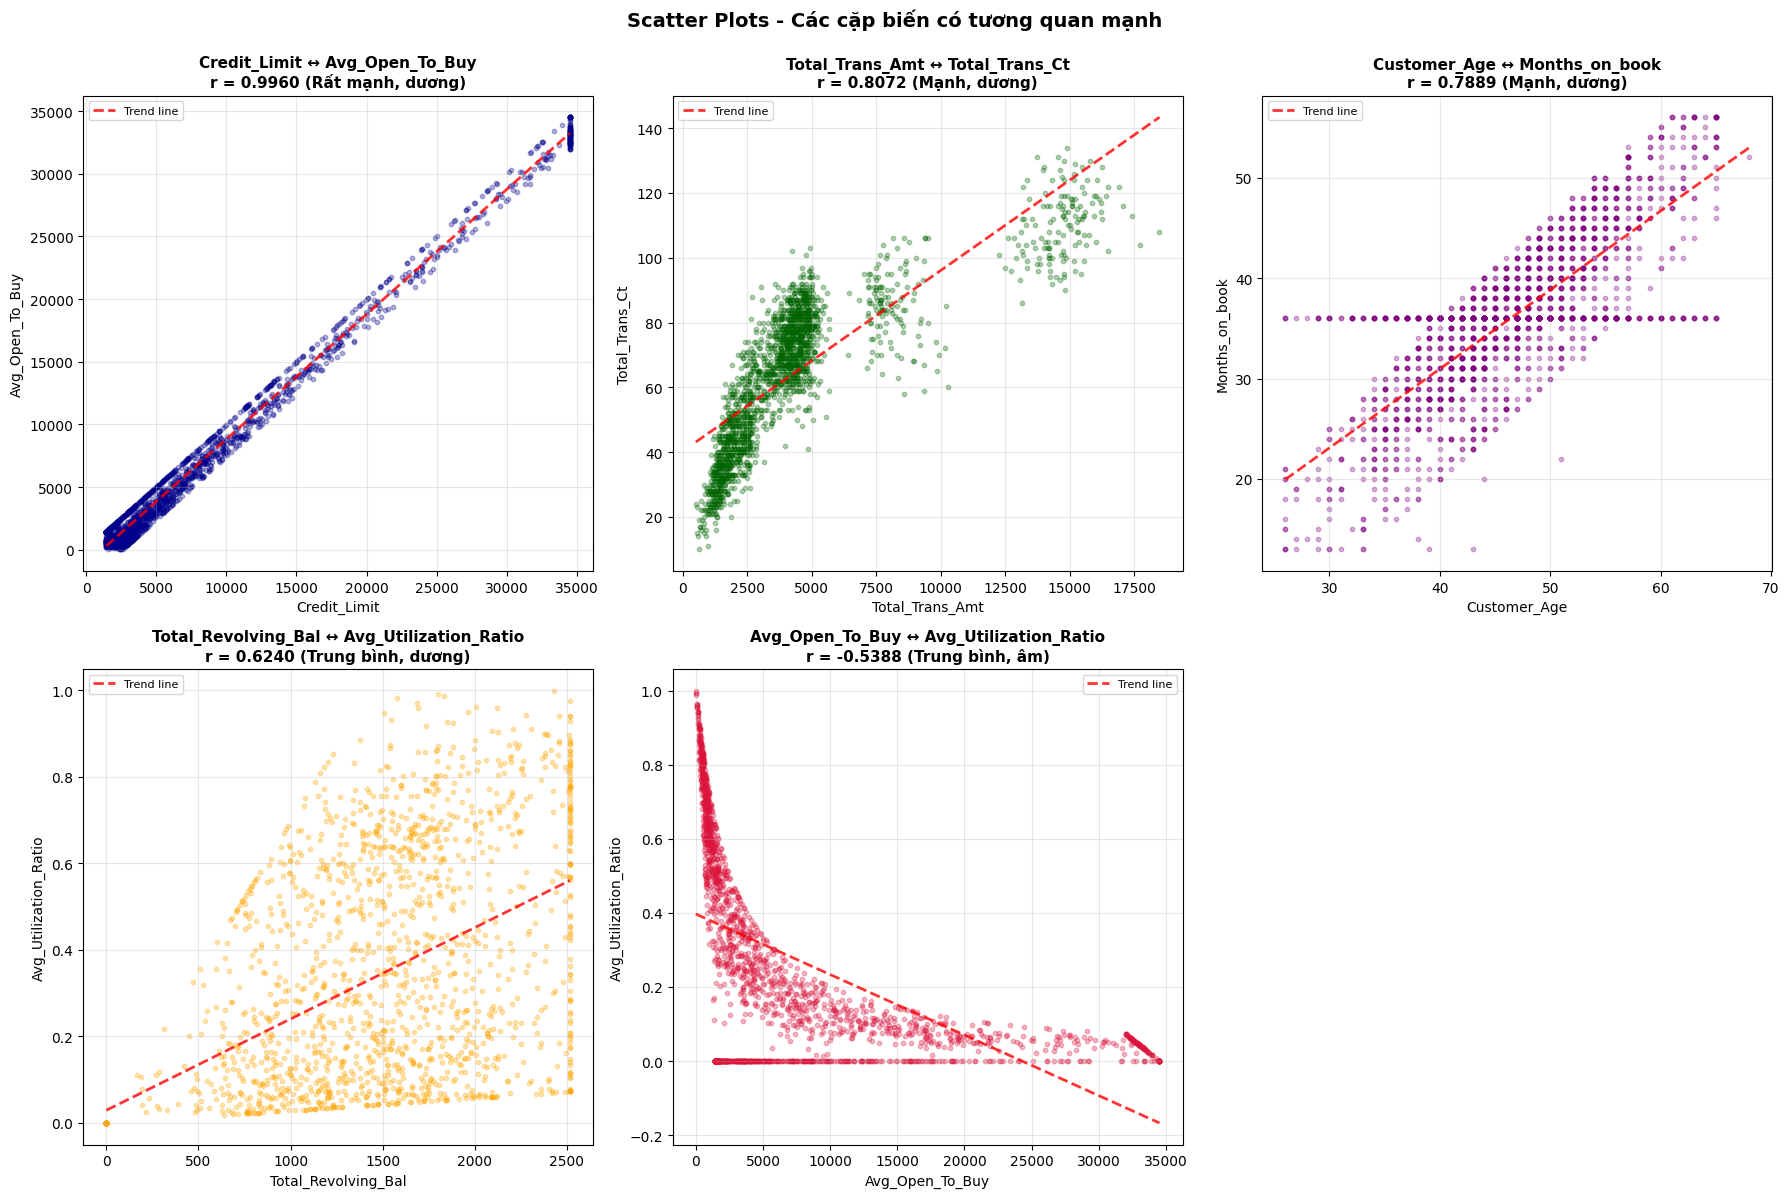


NHẬN XÉT TỪ CÁC BIỂU ĐỒ:
   1. Credit_Limit ↔ Avg_Open_To_Buy: Quan hệ tuyến tính GẦN NHƯ HOÀN HẢO
   2. Total_Trans_Amt ↔ Total_Trans_Ct: Quan hệ tuyến tính MẠNH với một số outliers
   3. Customer_Age ↔ Months_on_book: Quan hệ tuyến tính RÕ RÀNG, phân tán hợp lý
   4. Total_Revolving_Bal ↔ Avg_Utilization_Ratio: Quan hệ dương, có sự phân tán
   5. Avg_Open_To_Buy ↔ Avg_Utilization_Ratio: Quan hệ ÂM rõ ràng


In [93]:
# VISUALIZATION - SCATTER PLOTS CHO CÁC CẶP TƯƠNG QUAN MẠNH
print("="*80)
print("SCATTER PLOTS - BIỂU ĐỒ PHÂN TÁN CÁC CẶP TƯƠNG QUAN MẠNH")
print("="*80)

# Tạo figure với 5 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# 1. Credit_Limit vs Avg_Open_To_Buy
ax = axes[0]
idx1 = numeric_col_names.index('Credit_Limit')
idx2 = numeric_col_names.index('Avg_Open_To_Buy')
x_data = numeric_matrix[:, idx1]
y_data = numeric_matrix[:, idx2]

# Sample để vẽ nhanh hơn (lấy 2000 điểm)
sample_size = min(2000, len(x_data))
sample_indices = np.random.choice(len(x_data), sample_size, replace=False)
x_sample = x_data[sample_indices]
y_sample = y_data[sample_indices]

ax.scatter(x_sample, y_sample, alpha=0.3, s=10, color='darkblue')
ax.set_xlabel('Credit_Limit', fontsize=10)
ax.set_ylabel('Avg_Open_To_Buy', fontsize=10)
ax.set_title(f'Credit_Limit ↔ Avg_Open_To_Buy\nr = 0.9960 (Rất mạnh, dương)', 
             fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)

# Thêm regression line
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
ax.plot(sorted(x_sample), p(sorted(x_sample)), "r--", linewidth=2, alpha=0.8, label='Trend line')
ax.legend(fontsize=8)

# 2. Total_Trans_Amt vs Total_Trans_Ct
ax = axes[1]
idx1 = numeric_col_names.index('Total_Trans_Amt')
idx2 = numeric_col_names.index('Total_Trans_Ct')
x_data = numeric_matrix[:, idx1]
y_data = numeric_matrix[:, idx2]

sample_indices = np.random.choice(len(x_data), sample_size, replace=False)
x_sample = x_data[sample_indices]
y_sample = y_data[sample_indices]

ax.scatter(x_sample, y_sample, alpha=0.3, s=10, color='darkgreen')
ax.set_xlabel('Total_Trans_Amt', fontsize=10)
ax.set_ylabel('Total_Trans_Ct', fontsize=10)
ax.set_title(f'Total_Trans_Amt ↔ Total_Trans_Ct\nr = 0.8072 (Mạnh, dương)', 
             fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
ax.plot(sorted(x_sample), p(sorted(x_sample)), "r--", linewidth=2, alpha=0.8, label='Trend line')
ax.legend(fontsize=8)

# 3. Customer_Age vs Months_on_book
ax = axes[2]
idx1 = numeric_col_names.index('Customer_Age')
idx2 = numeric_col_names.index('Months_on_book')
x_data = numeric_matrix[:, idx1]
y_data = numeric_matrix[:, idx2]

sample_indices = np.random.choice(len(x_data), sample_size, replace=False)
x_sample = x_data[sample_indices]
y_sample = y_data[sample_indices]

ax.scatter(x_sample, y_sample, alpha=0.3, s=10, color='purple')
ax.set_xlabel('Customer_Age', fontsize=10)
ax.set_ylabel('Months_on_book', fontsize=10)
ax.set_title(f'Customer_Age ↔ Months_on_book\nr = 0.7889 (Mạnh, dương)', 
             fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
ax.plot(sorted(x_sample), p(sorted(x_sample)), "r--", linewidth=2, alpha=0.8, label='Trend line')
ax.legend(fontsize=8)

# 4. Total_Revolving_Bal vs Avg_Utilization_Ratio
ax = axes[3]
idx1 = numeric_col_names.index('Total_Revolving_Bal')
idx2 = numeric_col_names.index('Avg_Utilization_Ratio')
x_data = numeric_matrix[:, idx1]
y_data = numeric_matrix[:, idx2]

sample_indices = np.random.choice(len(x_data), sample_size, replace=False)
x_sample = x_data[sample_indices]
y_sample = y_data[sample_indices]

ax.scatter(x_sample, y_sample, alpha=0.3, s=10, color='orange')
ax.set_xlabel('Total_Revolving_Bal', fontsize=10)
ax.set_ylabel('Avg_Utilization_Ratio', fontsize=10)
ax.set_title(f'Total_Revolving_Bal ↔ Avg_Utilization_Ratio\nr = 0.6240 (Trung bình, dương)', 
             fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
ax.plot(sorted(x_sample), p(sorted(x_sample)), "r--", linewidth=2, alpha=0.8, label='Trend line')
ax.legend(fontsize=8)

# 5. Avg_Open_To_Buy vs Avg_Utilization_Ratio
ax = axes[4]
idx1 = numeric_col_names.index('Avg_Open_To_Buy')
idx2 = numeric_col_names.index('Avg_Utilization_Ratio')
x_data = numeric_matrix[:, idx1]
y_data = numeric_matrix[:, idx2]

sample_indices = np.random.choice(len(x_data), sample_size, replace=False)
x_sample = x_data[sample_indices]
y_sample = y_data[sample_indices]

ax.scatter(x_sample, y_sample, alpha=0.3, s=10, color='crimson')
ax.set_xlabel('Avg_Open_To_Buy', fontsize=10)
ax.set_ylabel('Avg_Utilization_Ratio', fontsize=10)
ax.set_title(f'Avg_Open_To_Buy ↔ Avg_Utilization_Ratio\nr = -0.5388 (Trung bình, âm)', 
             fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3)

z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
ax.plot(sorted(x_sample), p(sorted(x_sample)), "r--", linewidth=2, alpha=0.8, label='Trend line')
ax.legend(fontsize=8)

# Ẩn subplot thứ 6 (thừa)
axes[5].set_visible(False)

plt.suptitle('Scatter Plots - Các cặp biến có tương quan mạnh', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()
print("\nNHẬN XÉT TỪ CÁC BIỂU ĐỒ:")
print("   1. Credit_Limit ↔ Avg_Open_To_Buy: Quan hệ tuyến tính GẦN NHƯ HOÀN HẢO")
print("   2. Total_Trans_Amt ↔ Total_Trans_Ct: Quan hệ tuyến tính MẠNH với một số outliers")
print("   3. Customer_Age ↔ Months_on_book: Quan hệ tuyến tính RÕ RÀNG, phân tán hợp lý")
print("   4. Total_Revolving_Bal ↔ Avg_Utilization_Ratio: Quan hệ dương, có sự phân tán")
print("   5. Avg_Open_To_Buy ↔ Avg_Utilization_Ratio: Quan hệ ÂM rõ ràng")

### 7.1. Cross-tabulations - Bảng chéo giữa các biến phân loại

In [94]:
# CROSS-TABULATION - BẢNG CHÉO GIỮA CÁC BIẾN PHÂN LOẠI
print("="*80)
print("CROSS-TABULATION ANALYSIS")
print("="*80)

# Danh sách biến phân loại (không bao gồm Attrition_Flag)
print("\nCác biến phân loại có sẵn:")
cat_cols_for_crosstab = [col for col in categorical_cols if col != 'Attrition_Flag']
for i, col in enumerate(cat_cols_for_crosstab, 1):
    col_idx = column_names.index(col)
    col_data = raw_data[:, col_idx]
    unique_count = len(set(col_data))
    print(f"   {i}. {col} ({unique_count} giá trị)")

print(f"\n Biến mục tiêu: Attrition_Flag (2 giá trị: Existing, Attrited)")

print("\n" + "="*80)
print("CÁC BẢNG CHÉO QUAN TRỌNG")
print("="*80)

# Hàm tạo cross-tabulation
def create_crosstab(col1_name, col2_name, raw_data, column_names):
    """
    Tạo bảng chéo giữa 2 biến phân loại
    """
    # Lấy index của 2 cột
    col1_idx = column_names.index(col1_name)
    col2_idx = column_names.index(col2_name)
    
    # Lấy dữ liệu
    col1_data = raw_data[:, col1_idx]
    col2_data = raw_data[:, col2_idx]
    
    # Tìm unique values
    col1_unique = sorted(set(col1_data))
    col2_unique = sorted(set(col2_data))
    
    # Tạo ma trận đếm
    counts = {}
    for val1 in col1_unique:
        counts[val1] = {}
        for val2 in col2_unique:
            counts[val1][val2] = 0
    
    # Đếm frequency
    for i in range(len(col1_data)):
        v1 = col1_data[i]
        v2 = col2_data[i]
        counts[v1][v2] += 1
    
    return counts, col1_unique, col2_unique

# Hàm hiển thị bảng chéo
def display_crosstab(col1_name, col2_name, counts, col1_unique, col2_unique):
    """
    Hiển thị bảng chéo với frequency và percentage
    """
    print(f"\n{'='*80}")
    print(f"{col1_name} × {col2_name}")
    print(f"{'='*80}")
    
    # Tính tổng cho mỗi hàng và cột
    row_totals = {}
    col_totals = {}
    grand_total = 0
    
    for val1 in col1_unique:
        row_totals[val1] = sum(counts[val1].values())
        grand_total += row_totals[val1]
    
    for val2 in col2_unique:
        col_totals[val2] = sum(counts[val1][val2] for val1 in col1_unique)
    
    # BẢNG 1: FREQUENCY (COUNT)
    print(f"\n FREQUENCY TABLE (Số lượng):")
    print("-"*80)
    
    # Header
    header = f"{col1_name:<25}"
    for val2 in col2_unique:
        val2_short = val2[:12] if len(val2) > 12 else val2
        header += f"{val2_short:>15}"
    header += f"{'Total':>15}"
    print(header)
    print("-"*80)
    
    # Rows
    for val1 in col1_unique:
        val1_short = val1[:24] if len(val1) > 24 else val1
        row = f"{val1_short:<25}"
        for val2 in col2_unique:
            row += f"{counts[val1][val2]:>15,}"
        row += f"{row_totals[val1]:>15,}"
        print(row)
    
    # Total row
    total_row = f"{'Total':<25}"
    for val2 in col2_unique:
        total_row += f"{col_totals[val2]:>15,}"
    total_row += f"{grand_total:>15,}"
    print("-"*80)
    print(total_row)
    
    # BẢNG 2: PERCENTAGE BY ROW (% theo hàng)
    print(f"\n PERCENTAGE BY ROW (% theo hàng - tổng mỗi hàng = 100%):")
    print("-"*80)
    
    # Header
    header = f"{col1_name:<25}"
    for val2 in col2_unique:
        val2_short = val2[:12] if len(val2) > 12 else val2
        header += f"{val2_short:>15}"
    print(header)
    print("-"*80)
    
    # Rows
    for val1 in col1_unique:
        val1_short = val1[:24] if len(val1) > 24 else val1
        row = f"{val1_short:<25}"
        for val2 in col2_unique:
            pct = (counts[val1][val2] / row_totals[val1] * 100) if row_totals[val1] > 0 else 0
            row += f"{pct:>14.2f}%"
        print(row)
    
    # BẢNG 3: PERCENTAGE BY COLUMN (% theo cột)
    print(f"\n PERCENTAGE BY COLUMN (% theo cột - tổng mỗi cột = 100%):")
    print("-"*80)
    
    # Header
    header = f"{col1_name:<25}"
    for val2 in col2_unique:
        val2_short = val2[:12] if len(val2) > 12 else val2
        header += f"{val2_short:>15}"
    print(header)
    print("-"*80)
    
    # Rows
    for val1 in col1_unique:
        val1_short = val1[:24] if len(val1) > 24 else val1
        row = f"{val1_short:<25}"
        for val2 in col2_unique:
            pct = (counts[val1][val2] / col_totals[val2] * 100) if col_totals[val2] > 0 else 0
            row += f"{pct:>14.2f}%"
        print(row)

CROSS-TABULATION ANALYSIS

Các biến phân loại có sẵn:
   1. Gender (2 giá trị)
   2. Education_Level (7 giá trị)
   3. Marital_Status (4 giá trị)
   4. Income_Category (6 giá trị)
   5. Card_Category (4 giá trị)

 Biến mục tiêu: Attrition_Flag (2 giá trị: Existing, Attrited)

CÁC BẢNG CHÉO QUAN TRỌNG


In [95]:
# 1. ATTRITION_FLAG × GENDER
counts, col1_unique, col2_unique = create_crosstab('Attrition_Flag', 'Gender', raw_data, column_names)
display_crosstab('Attrition_Flag', 'Gender', counts, col1_unique, col2_unique)


Attrition_Flag × Gender

 FREQUENCY TABLE (Số lượng):
--------------------------------------------------------------------------------
Attrition_Flag                         F              M          Total
--------------------------------------------------------------------------------
Attrited Customer                    930            697          1,627
Existing Customer                  4,428          4,072          8,500
--------------------------------------------------------------------------------
Total                              5,358          4,769         10,127

 PERCENTAGE BY ROW (% theo hàng - tổng mỗi hàng = 100%):
--------------------------------------------------------------------------------
Attrition_Flag                         F              M
--------------------------------------------------------------------------------
Attrited Customer                 57.16%         42.84%
Existing Customer                 52.09%         47.91%

 PERCENTAGE BY COLUMN (% theo

In [96]:
# 2. ATTRITION_FLAG × CARD_CATEGORY
counts, col1_unique, col2_unique = create_crosstab('Attrition_Flag', 'Card_Category', raw_data, column_names)
display_crosstab('Attrition_Flag', 'Card_Category', counts, col1_unique, col2_unique)



Attrition_Flag × Card_Category

 FREQUENCY TABLE (Số lượng):
--------------------------------------------------------------------------------
Attrition_Flag                      Blue           Gold       Platinum         Silver          Total
--------------------------------------------------------------------------------
Attrited Customer                  1,519             21              5             82          1,627
Existing Customer                  7,917             95             15            473          8,500
--------------------------------------------------------------------------------
Total                              9,436            116             20            555         10,127

 PERCENTAGE BY ROW (% theo hàng - tổng mỗi hàng = 100%):
--------------------------------------------------------------------------------
Attrition_Flag                      Blue           Gold       Platinum         Silver
------------------------------------------------------------------

In [97]:
# 3. ATTRITION_FLAG × EDUCATION_LEVEL
counts, col1_unique, col2_unique = create_crosstab('Attrition_Flag', 'Education_Level', raw_data, column_names)
display_crosstab('Attrition_Flag', 'Education_Level', counts, col1_unique, col2_unique)


Attrition_Flag × Education_Level

 FREQUENCY TABLE (Số lượng):
--------------------------------------------------------------------------------
Attrition_Flag                   College      Doctorate       Graduate    High School   Post-Graduat     Uneducated        Unknown          Total
--------------------------------------------------------------------------------
Attrited Customer                    154             95            487            306             92            237            256          1,627
Existing Customer                    859            356          2,641          1,707            424          1,250          1,263          8,500
--------------------------------------------------------------------------------
Total                              1,013            451          3,128          2,013            516          1,487          1,519         10,127

 PERCENTAGE BY ROW (% theo hàng - tổng mỗi hàng = 100%):
---------------------------------------------------

In [98]:
# 4. ATTRITION_FLAG × INCOME_CATEGORY
counts, col1_unique, col2_unique = create_crosstab('Attrition_Flag', 'Income_Category', raw_data, column_names)
display_crosstab('Attrition_Flag', 'Income_Category', counts, col1_unique, col2_unique)


Attrition_Flag × Income_Category

 FREQUENCY TABLE (Số lượng):
--------------------------------------------------------------------------------
Attrition_Flag                   $120K +    $40K - $60K    $60K - $80K   $80K - $120K   Less than $4        Unknown          Total
--------------------------------------------------------------------------------
Attrited Customer                    126            271            189            242            612            187          1,627
Existing Customer                    601          1,519          1,213          1,293          2,949            925          8,500
--------------------------------------------------------------------------------
Total                                727          1,790          1,402          1,535          3,561          1,112         10,127

 PERCENTAGE BY ROW (% theo hàng - tổng mỗi hàng = 100%):
--------------------------------------------------------------------------------
Attrition_Flag                

In [99]:
# 5. ATTRITION_FLAG × MARITAL_STATUS
counts, col1_unique, col2_unique = create_crosstab('Attrition_Flag', 'Marital_Status', raw_data, column_names)
display_crosstab('Attrition_Flag', 'Marital_Status', counts, col1_unique, col2_unique)


Attrition_Flag × Marital_Status

 FREQUENCY TABLE (Số lượng):
--------------------------------------------------------------------------------
Attrition_Flag                  Divorced        Married         Single        Unknown          Total
--------------------------------------------------------------------------------
Attrited Customer                    121            709            668            129          1,627
Existing Customer                    627          3,978          3,275            620          8,500
--------------------------------------------------------------------------------
Total                                748          4,687          3,943            749         10,127

 PERCENTAGE BY ROW (% theo hàng - tổng mỗi hàng = 100%):
--------------------------------------------------------------------------------
Attrition_Flag                  Divorced        Married         Single        Unknown
-----------------------------------------------------------------

In [100]:
# 6. GENDER × CARD_CATEGORY
counts, col1_unique, col2_unique = create_crosstab('Gender', 'Card_Category', raw_data, column_names)
display_crosstab('Gender', 'Card_Category', counts, col1_unique, col2_unique)



Gender × Card_Category

 FREQUENCY TABLE (Số lượng):
--------------------------------------------------------------------------------
Gender                              Blue           Gold       Platinum         Silver          Total
--------------------------------------------------------------------------------
F                                  5,101             38              9            210          5,358
M                                  4,335             78             11            345          4,769
--------------------------------------------------------------------------------
Total                              9,436            116             20            555         10,127

 PERCENTAGE BY ROW (% theo hàng - tổng mỗi hàng = 100%):
--------------------------------------------------------------------------------
Gender                              Blue           Gold       Platinum         Silver
--------------------------------------------------------------------------

In [101]:
# 7. EDUCATION_LEVEL × INCOME_CATEGORY
counts, col1_unique, col2_unique = create_crosstab('Education_Level', 'Income_Category', raw_data, column_names)
display_crosstab('Education_Level', 'Income_Category', counts, col1_unique, col2_unique)



Education_Level × Income_Category

 FREQUENCY TABLE (Số lượng):
--------------------------------------------------------------------------------
Education_Level                  $120K +    $40K - $60K    $60K - $80K   $80K - $120K   Less than $4        Unknown          Total
--------------------------------------------------------------------------------
College                               70            183            132            175            345            108          1,013
Doctorate                             37             70             59             57            158             70            451
Graduate                             204            553            422            478          1,139            332          3,128
High School                          147            355            307            308            671            225          2,013
Post-Graduate                         30            111             77             81            170             47   

# 8 Câu Hỏi Từ Dữ Liệu Credit Card Customers

Dựa trên quá trình khám phá dữ liệu, dưới đây là 3 câu hỏi thực tế giúp chúng ta hiểu rõ hơn về hành vi khách hàng và các yếu tố rủi ro tiềm ẩn.

---

### 1. Học vấn càng cao thì thu nhập càng "khủng"?
**Câu hỏi:** Liệu những khách hàng có trình độ học vấn cao (như Tiến sĩ - Doctorate) có tỷ lệ thu nhập cao hơn hẳn so với những người có trình độ thấp hơn (như Chưa đi học - Uneducated) không?

**Câu trả lời:**
Thật bất ngờ là **KHÔNG hoàn toàn đúng**. Dữ liệu cho thấy sự phân bổ thu nhập khá tương đồng giữa các nhóm học vấn:
- Nhóm **Tiến sĩ (Doctorate)**: Chỉ khoảng **8.2%** có thu nhập trên $120K.
- Nhóm **Chưa đi học (Uneducated)**: Có khoảng **8.0%** có thu nhập trên $120K.
- Đa số khách hàng ở **mọi trình độ học vấn** đều tập trung nhiều nhất ở mức thu nhập **Dưới $40K** (chiếm khoảng 33% - 36%).

> **Kết luận:** Tại ngân hàng này, bằng cấp không phải là yếu tố quyết định việc khách hàng có thuộc nhóm thu nhập "khủng" hay không.

---

### 2. Nam giới hay Nữ giới được ngân hàng "ưu ái" cấp hạn mức tín dụng cao hơn?
**Câu hỏi:** Có sự chênh lệch đáng kể nào về Hạn mức tín dụng trung bình (Credit Limit) giữa khách hàng Nam và Nữ không?

**Câu trả lời:**
Có một sự chênh lệch **RẤT LỚN**:
- Trung bình hạn mức tín dụng của **Nữ giới (F)**: ~ **5,023 USD**.
- Trung bình hạn mức tín dụng của **Nam giới (M)**: ~ **12,685 USD**.

> **Kết luận:** Khách hàng Nam tại ngân hàng này có hạn mức tín dụng trung bình cao gấp **2.5 lần** so với khách hàng Nữ.

---

### 3. Dấu hiệu "báo động đỏ" nào cho thấy khách hàng sắp rời bỏ ngân hàng?
**Câu hỏi:** Khách hàng rời bỏ ngân hàng (Attrited Customer) và khách hàng trung thành (Existing Customer) khác nhau rõ rệt nhất ở điểm nào trong hành vi giao dịch?

**Câu trả lời:**
Sự khác biệt nằm rõ rệt ở **Số lượng giao dịch (Total Transaction Count)**:
- Khách hàng **Trung thành**: Thực hiện trung bình khoảng **69 giao dịch/năm**.
- Khách hàng **Rời bỏ**: Chỉ thực hiện trung bình khoảng **45 giao dịch/năm**.

> **Kết luận:** Nếu một khách hàng có tần suất sử dụng thẻ thấp (ít giao dịch), đó là một dấu hiệu cảnh báo sớm rằng họ có nguy cơ cao sẽ rời bỏ ngân hàng.